# Customer Segmentation of an E-Commerce Company

### RFM Analysis, K-Means Clustering and Cohort Analysis

# #Determines

Using the [Online Retail dataset](https://archive.ics.uci.edu/ml/datasets/Online+Retail) from the UCI Machine Learning Repository, a ***Customer Segmentation*** analysis will be performed in this project. The main methods will be ***RFM Analysis***, ***K-Means Clustering*** and ***Cohort Analysis***.


**Data:**

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Feature Information:

**InvoiceNo**: Invoice number. *Nominal*, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
<br>
**StockCode**: Product (item) code. *Nominal*, a 5-digit integral number uniquely assigned to each distinct product.
<br>
**Description**: Product (item) name. *Nominal*. 
<br>
**Quantity**: The quantities of each product (item) per transaction. *Numeric*.
<br>
**InvoiceDate**: Invoice Date and time. *Numeric*, the day and time when each transaction was generated.
<br>
**UnitPrice**: Unit price. *Numeric*, Product price per unit in sterling.
<br>
**CustomerID**: Customer number. *Nominal*, a 5-digit integral number uniquely assigned to each customer.
<br>
**Country**: Country name. *Nominal*, the name of the country where each customer resides.


---


First of all, to observe the structure of the data and missing values, we will use exploratory data analysis and data visualization techniques.

Afterthat, in order to understand the relationship of the features to each other and clear the noise and missing values in the data, we will implement descriptive statistics andprepare the data for RFM analysis.

Before starting the RFM Analysis, the distribution of *Orders*, *Customers* and *Countries* will be analysed to enable the company develop its sales policies and contribute to the correct use of resources.

Since the UK has the most sales revenue with the highest number of customers we will continue to analyze only UK transactions in the next RFM Analysis, Customer Segmentation and K-Means Clustering topics. Next steps will be:

- RFM Analysis: a customer segmentation technique based on customers' past purchasing behavior. By using RFM Analysis, we can enable companies to develop different approaches to different customer segments so that they can know their customers better, observe trends better, and increase customer retention and sales revenues.

- K_means algorithm:  We will segment the customers based on their recency, frequency, and monetary values. But can an **unsupervised learning** model do this better for us? We will use K-Means algorithm to find the answer to this question. 

- Finally, we will imlement Cohort Analysis . Cohort analysis is a subset of behavioral analytics that takes the user data and breaks them into related groups for analysis. This analysis can further be used to do customer segmentation and track metrics like retention, churn, and lifetime value.


# #Project Structures

- Data Cleaning & Exploratory Data Analysis
- RFM Analysis
- Customer Segmentation
- Applying K-Means Clustering
- Create Cohort and Conduct Cohort Analysis

# #Tasks

#### 1. Data Cleaning & Exploratory Data Analysis

- Import Modules, Load Data & Data Review
- Follow the Steps Below

    *i. Take a look at relationships between InvoiceNo, Quantity and UnitPrice columns.*
    
    *ii. What does the letter "C" in the invoiceno column mean?*
    
    *iii. Handling Missing Values*
    
    *iv. Clean the Data from the Noise and Missing Values*
    
    *v. Explore the Orders*
    
    *vi. Explore Customers by Country*
    
    *vii. Explore the UK Market*
    
#### 2. RFM Analysis

- Follow the steps below

   *i. Import Libraries*
   
   *ii. Review "df_uk" DataFrame (the df_uk what you create at the end of the Task 1)*
   
   *iii. Calculate Recency*
   
   *iv. Calculate Frequency*
   
   *v. Calculate Monetary Values*
   
   *vi. Create RFM Table*

#### 3. Customer Segmentation with RFM Scores
- Calculate RFM Scoring

    *i. Creating the RFM Segmentation Table*
 
- Plot RFM Segments

#### 4. Applying K-Means Clustering
- Data Pre-Processing and Exploring

    *i. Define and Plot Feature Correlations*
 
    *ii. Visualize Feature Distributions*
 
    *iii. Data Normalization*

- K-Means Implementation

    *i. Define Optimal Cluster Number (K) by using "Elbow Method" and "Silhouette Analysis"*
 
    *ii. Visualize the Clusters*
 
    *iii. Assign the label*
 
    *iv. Conclusion*
 
#### 5. Create Cohort and Conduct Cohort Analysis
- Future Engineering

    *i. Extract the Month of the Purchase*
 
    *ii. Calculating time offset in Months i.e. Cohort Index*
 
- Create 1st Cohort: User Number & Retention Rate 

    *i. Pivot Cohort and Cohort Retention*
 
    *ii. Visualize analysis of cohort 1 using seaborn and matplotlib*

- Create 2nd Cohort: Average Quantity Sold 

    *i. Pivot Cohort and Cohort Retention*
 
    *ii. Visualize analysis of cohort 2 using seaborn and matplotlib*

- Create 3rd Cohort: Average Sales

    *i. Pivot Cohort and Cohort Retention*
 
    *ii. Visualize analysis of cohort 3 using seaborn and matplotlib*


# 1. Data Cleaning & Exploratory Data Analysis

## Import Modules, Load Data & Data Review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

In [3]:
df0 = pd.read_csv("Online Retail.csv") # load the data and display examples
df0.sample(10)

InvoiceNo StockCode                          Description  Quantity   
376488    569524     23219          LAUREL STAR ANTIQUE SILVER          1  \
533055    581006     21537           RED RETROSPOT PUDDING BOWL         8   
499284    578664     22599          CHRISTMAS MUSICAL ZINC STAR         6   
171314    551412     22059        CERAMIC STRAWBERRY DESIGN MUG         4   
397525    571188     21181         PLEASE ONE PERSON METAL SIGN        12   
520995    580306     22562               MONSTERS STENCIL CRAFT        12   
157731    550210    84872a  TEATIME FUNKY FLOWER BACKPACK FOR 2         3   
74805     542527     22971              QUEENS GUARD COFFEE MUG         6   
279060    561231     22652                    TRAVEL SEWING KIT         9   
403737    571653     84946         ANTIQUE SILVER T-LIGHT GLASS        12   

                InvoiceDate  UnitPrice  CustomerID         Country  
376488  2011-10-04 14:42:00       1.25     14506.0  United Kingdom  
533055  2011-12-07 08:45:00       4.25     14911.0            EIRE  
499284  2011-11-24 16:59:00       0.29     15910.0  United Kingdom  
171314  2011-04-28 13:31:00       1.49     15508.0  United Kingdom  
397525  2011-10-14 11:42:00       2.10     12783.0        Portugal  
520995  2011-12-02 14:29:00       1.25     14250.0  United Kingdom  
157731  2011-04-15 10:40:00      10.79         NaN  United Kingdom  
74805   2011-01-28 12:48:00       2.55     17188.0  United Kingdom  
279060  2011-07-26 10:20:00       1.65     15855.0  United Kingdom  
403737  2011-10-18 12:17:00       1.06     14298.0  United Kingdom

In [3]:
df = df0.copy() # Create a deep copy

In [4]:
df.info() # A general look to the data
display(df.shape)

# Results: - missing values in some fatures; - possible feature engineering: price= quantity X unit price

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


(541909, 8)

In [5]:
df.describe() # check general statistics for numeric values

# check negative values for quantity and unit price
# check otuliers for unit price bec std > mean
# check outliers for quantity bec std > mean

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [6]:
# check duplicates
df.duplicated().sum()

5268

In [7]:
df[df.duplicated()]

InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

                InvoiceDate  UnitPrice  CustomerID         Country  
517     2010-12-01 11:45:00       1.25     17908.0  United Kingdom  
527     2010-12-01 11:45:00       2.10     17908.0  United Kingdom  
537     2010-12-01 11:45:00       2.95     17908.0  United Kingdom  
539     2010-12-01 11:45:00       4.95     17908.0  United Kingdom  
555     2010-12-01 11:49:00       2.95     17920.0  United Kingdom  
...                     ...        ...         ...             ...  
541675  2011-12-09 11:34:00       0.39     14446.0  United Kingdom  
541689  2011-12-09 11:34:00       2.49     14446.0  United Kingdom  
541692  2011-12-09 11:34:00       1.95     14446.0  United Kingdom  
541699  2011-12-09 11:34:00       2.10     14446.0  United Kingdom  
541701  2011-12-09 11:34:00       2.08     14446.0  United Kingdom  

[5268 rows x 8 columns]

In [8]:
# check some of them
df[(df["InvoiceNo"] == 581538) & (df["StockCode"] == 22068)]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

In [9]:
df[(df["InvoiceNo"] == 536409) & (df["StockCode"] == 22111)]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

**Result for duplicates**: There are 5268 entries in the dataset. It's possible that the same customer can buy the same product more than once in the same order. Therefore, it's difficult to be sure whether these data points are valid or invalid duplicates. As a result, duplicates will not be removed from the dataset.

In [10]:
# check if there are any columns with mixed types
# Which columns have mixed datatypes:

class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

def check_obj_columns(df):
    '''
    Returns NO PROBLEM or column/s which has/have mixed object types.
    '''    
    
    tdf = df.select_dtypes(include=['object']).applymap(type)
    for col in tdf:
        if len(set(tdf[col].values)) > 1:
            print("Column" + " " + color.BOLD + color.RED + col + color.END + " " + "has mixed object types." )
    else:
        if len(set(tdf[col].values)) == 1:
            print(color.BOLD + color.GREEN + " " + "NO PROBLEM" + " " + color.END + " " + "with the data types of Columns in the DataFrame.")

check_obj_columns(df)

Column Description has mixed object types.
 NO PROBLEM  with the data types of Columns in the DataFrame.


**Result:** These features will be handled below.

In [11]:
# Let's. create a user-defined function to see the details of the features in the dataset
def analyze_dataframe(df):
    """ This function displays number of unique values for
    each features in the dataset and displays distribution for each numeric
    feature"""
    # Check data types
    print("Data Types:")
    print(df.dtypes)
    print("\n")
    
    # Value counts for object datatype features
    object_features = df.select_dtypes(include='object').columns.tolist()
    for feature in object_features:
        print(f"Value counts for {feature}:")
        print(df[feature].value_counts())
        print("\n")
    
    # Plot distribution for numeric features
    """ numeric_features = df.select_dtypes(include=['int', 'float']).columns.tolist()
    for feature in numeric_features:
        plt.figure(figsize=(8, 6))
        plt.hist(df[feature], bins='auto', color='skyblue')
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(f"Distribution of {feature}")
        plt.show() """

In [12]:
analyze_dataframe(df)

Data Types:
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


Value counts for InvoiceNo:
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: InvoiceNo, Length: 25900, dtype: int64


Value counts for StockCode:
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: StockCode, Length: 4070, dtype: int64


Value counts for Description:
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Miss

**Insights:** As seen, UK dominates the entire data. An analysis based on the countries can be done in terms of categorising the countries as the UK and others. By doing so, we can also avoid a risk that the model can't learn from the data for the countries with too few samples.

For customer segmentation, number of customers is a very imprtant feature. Therefore, let's check also the number of unique customers below.

In [13]:
df.CustomerID.nunique()

4372

**Insight:** As seen, there are 4372 unique customers which is a very high number to ectract useful insights without feature engineering. This explains well why the customers should be clustered according to their transaction and buying patterns.

### i. Take a look at relationships between InvoiceNo, Quantity and UnitPrice columns.

We see that there are negative values in the Quantity and UnitPrice columns. These are possibly canceled and returned orders. Let's check it out.

In [14]:
df[df.Quantity < 0] # check orders with negative quantity

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

                InvoiceDate  UnitPrice  CustomerID         Country  
141     2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154     2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235     2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236     2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237     2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
...                     ...        ...         ...             ...  
540449  2011-12-09 09:57:00       0.83     14397.0  United Kingdom  
541541  2011-12-09 10:28:00     224.69     15498.0  United Kingdom  
541715  2011-12-09 11:57:00      10.95     15311.0  United Kingdom  
541716  2011-12-09 11:58:00       1.25     17315.0  United Kingdom  
541717  2011-12-09 11:58:00       1.25     17315.0  United Kingdom  

[10624 rows x 8 columns]

In [15]:
df[df.Quantity < 0].shape # There are 10624 negative Quantity values.

(10624, 8)

In [16]:
# Have these invoices been also saved as a positive value (income)? Check some of them
df[df.InvoiceNo == 536383]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

In [17]:
df[df.InvoiceNo == 581490]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

### ii. What does the letter "C" in the InvoiceNo column mean?

hint: If the invoice number starts with the letter "C", it means the order was cancelled. Or those who abandon their order.

In [18]:
df.InvoiceNo.value_counts()

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: InvoiceNo, Length: 25900, dtype: int64

In [19]:
df_c = df[df["InvoiceNo"].str.contains('[a-zA-Z]', na=False)]
df_c[df_c.InvoiceNo.str.startswith('A')]

InvoiceNo StockCode      Description  Quantity          InvoiceDate  \
299982   A563185         B  Adjust bad debt         1  2011-08-12 14:50:00   
299983   A563186         B  Adjust bad debt         1  2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1  2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  
299982   11062.06         NaN  United Kingdom  
299983  -11062.06         NaN  United Kingdom  
299984  -11062.06         NaN  United Kingdom

In [20]:
# check if there are any other values except C in the Invoice no feature
df_c[df_c["InvoiceNo"].str.startswith(('C', 'c')) == False]

# only the samples with adjust debt bad

InvoiceNo StockCode      Description  Quantity          InvoiceDate  \
299982   A563185         B  Adjust bad debt         1  2011-08-12 14:50:00   
299983   A563186         B  Adjust bad debt         1  2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1  2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  
299982   11062.06         NaN  United Kingdom  
299983  -11062.06         NaN  United Kingdom  
299984  -11062.06         NaN  United Kingdom

In [21]:
df_c.shape
# There are 9291 samples. 3 out of them are adjust bad debt and remaining 9281 are cancelled orders

(9291, 8)

When we filter canceled orders by Quantity> 0 or filter non-canceled orders by Quantity <0 nothing returns, this confirms that negative values mean the order was canceled. So lets find out how many orders were cancelled?

In [22]:
df_c[df_c.Quantity>0]
# nothing returns except adjust bad debt

InvoiceNo StockCode      Description  Quantity          InvoiceDate  \
299982   A563185         B  Adjust bad debt         1  2011-08-12 14:50:00   
299983   A563186         B  Adjust bad debt         1  2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1  2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  
299982   11062.06         NaN  United Kingdom  
299983  -11062.06         NaN  United Kingdom  
299984  -11062.06         NaN  United Kingdom

#### Looking deeper into why these orders were cancelled may prevent future cancellations. Now let's find out what a negative UnitPrice means.


In [23]:
# check price feature
df[df.UnitPrice < 0]

InvoiceNo StockCode      Description  Quantity          InvoiceDate  \
299983   A563186         B  Adjust bad debt         1  2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1  2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  
299983  -11062.06         NaN  United Kingdom  
299984  -11062.06         NaN  United Kingdom

**What does "adjust bad debt" mean?**


"Adjusting bad debt" refers to the process of accounting for and dealing with uncollectible accounts receivable. In accounting, when a customer fails to pay their outstanding debt, it becomes a bad debt or a doubtful account. Adjusting bad debt involves recognizing the potential loss in the financial records and making the necessary adjustments to reflect the realistic value of accounts receivable.

As seen, there are no corresponding customer Id for this values. That shows that these observations are not sale transactions, but rather an accounting procedure. Thefore, they can be removed from the data.

### iii. Handling Missing Values

Since the customer ID's are missing, lets assume these orders were not made by the customers already in the data set because those customers already have ID's. 

We also don't want to assign these orders to those customers because this would alter the insights we draw from the data. 


In [24]:
df.shape

(541909, 8)

In [25]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [26]:
inv_list = list(df[df.CustomerID.isnull()]["InvoiceNo"].unique())

In [27]:
df[df.CustomerID.isnull()]["InvoiceNo"]

622       536414
1443      536544
1444      536544
1445      536544
1446      536544
           ...  
541536    581498
541537    581498
541538    581498
541539    581498
541540    581498
Name: InvoiceNo, Length: 135080, dtype: object

In [28]:
# Let's check if it's possible to imputate these missing customer id's by using the existing invoice numbers
# are there any customer id's for these invoices no's which related to missing values in CustomerID feature
missing_customer_ids = df[df["CustomerID"].isnull()]["InvoiceNo"].unique()

# Check if there are non-missing customer IDs for these InvoiceNo values
non_missing_customer_ids = df[df["InvoiceNo"].isin(missing_customer_ids) & ~df["CustomerID"].isnull()]["CustomerID"].unique()
non_missing_customer_ids
# missing customer id's can't be filled with this method. In order not to manipulate the data negatively,
# they will be dropped


array([], dtype=float64)

### iv. Clean the Data from the Noise and Missing Values

In [29]:
df = df.dropna(subset=['CustomerID'])
df.shape

(406829, 8)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [31]:
# check all the observations with cancelled orders
# are the quantity of these orders negative?
df[df["InvoiceNo"].str.contains('[a-zA-Z]', na=False)]["Quantity"].sort_values()

# they can also be dropped.


540422   -80995
61624    -74215
4287      -9360
160145    -3114
160144    -2000
          ...  
349851       -1
349871       -1
176843       -1
176839       -1
141          -1
Name: Quantity, Length: 8905, dtype: int64

In [32]:
# before dropping 8905 observations
df.shape


(406829, 8)

In [33]:
# drop the observations with cancelled orders
df = df[~df["InvoiceNo"].str.contains('[a-zA-Z]', na=False)]
# after dropping 8905 observations
df.shape

(397924, 8)

In [34]:
# check are there any observations with negative quantity
df[df.Quantity<0]
# there aren't any

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

In [35]:
# check are there any observations with negative price
df[df.UnitPrice<0]
# there aren't any

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

In [36]:
# check final status of the data and missing values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### v. Explore the Orders


In [37]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom

1. Find the unique number of InvoiceNo  per customer

In [38]:
per_cust = df.groupby("CustomerID")["InvoiceNo"].nunique().sort_values(ascending=False)
per_cust
# there are 4339 unique invoices 

CustomerID
12748.0    210
14911.0    201
17841.0    124
13089.0     97
14606.0     93
          ... 
14355.0      1
13403.0      1
15488.0      1
14353.0      1
12346.0      1
Name: InvoiceNo, Length: 4339, dtype: int64

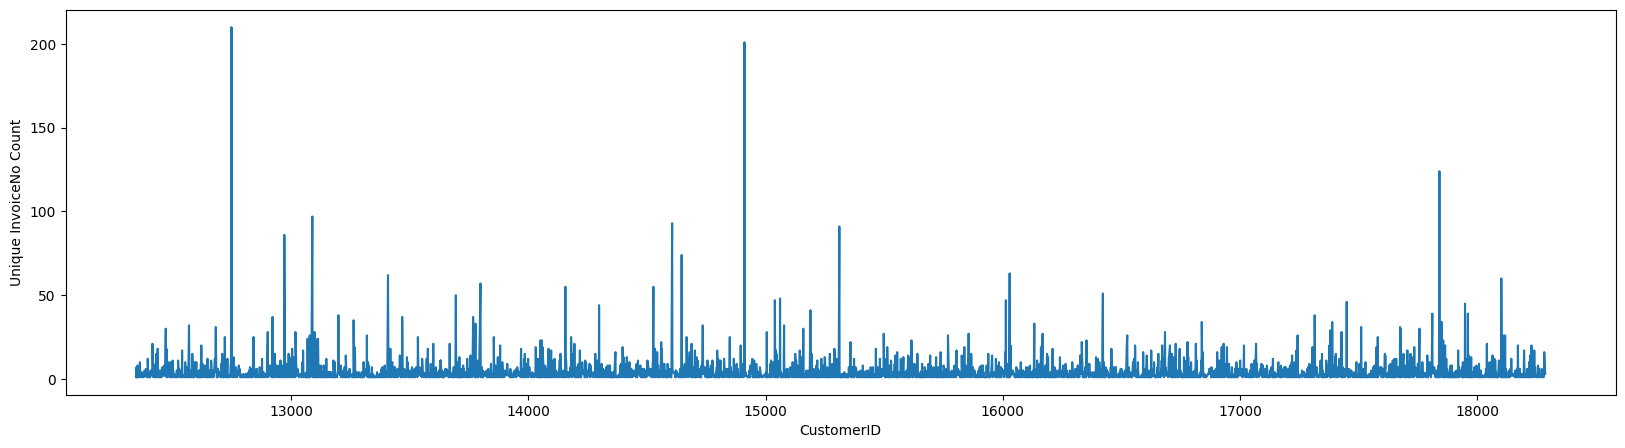

In [39]:
plt.figure(figsize=(20,5))
ax = sns.lineplot(per_cust)
plt.ylabel("Unique InvoiceNo Count")

plt.show();

2. What's the average number of unqiue items per order or per customer?

In [40]:
# Avg number of unique items per order is 20.9
df.groupby("InvoiceNo")["Description"].nunique().mean()

20.919939577039276

3. Let's see how this compares to the number of unique products per customer.

In [41]:
# Avg number of unique items per customer is 61.8
df.groupby("CustomerID")["Description"].nunique().mean()

61.833371744641624

### vi. Explore Customers by Country

1. What's the total revenue per country?

In [42]:
# create a total price fature by multipliying unit price and quantity
df["total_price"] = df.Quantity * df.UnitPrice
df.sample()

InvoiceNo StockCode                          Description  Quantity  \
358867    568165     20975  12 PENCILS SMALL TUBE RED RETROSPOT        24   

                InvoiceDate  UnitPrice  CustomerID         Country  \
358867  2011-09-25 12:42:00       0.65     17131.0  United Kingdom   

        total_price  
358867         15.6

In [43]:
revenue_per_country = df.groupby("Country")["total_price"].sum().sort_values(ascending=False)
revenue_per_country

Country
United Kingdom          7308391.554
Netherlands              285446.340
EIRE                     265545.900
Germany                  228867.140
France                   209024.050
Australia                138521.310
Spain                     61577.110
Switzerland               56443.950
Belgium                   41196.340
Sweden                    38378.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33439.890
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20450.440
Denmark                   18955.340
Italy                     17483.240
Cyprus                    13590.380
Austria                   10198.680
Poland                     7334.650
Israel                     7221.690
Greece                     4760.520
Iceland                    4310.000
Canada                     3666.380
USA                        3580.390
Malta                      2725.590
Unspecified         

2. Visualize number of customer per country

In [44]:
customer_count_per_country = df.groupby("Country")["CustomerID"].count().sort_values(ascending=False)
customer_count_per_country

Country
United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45


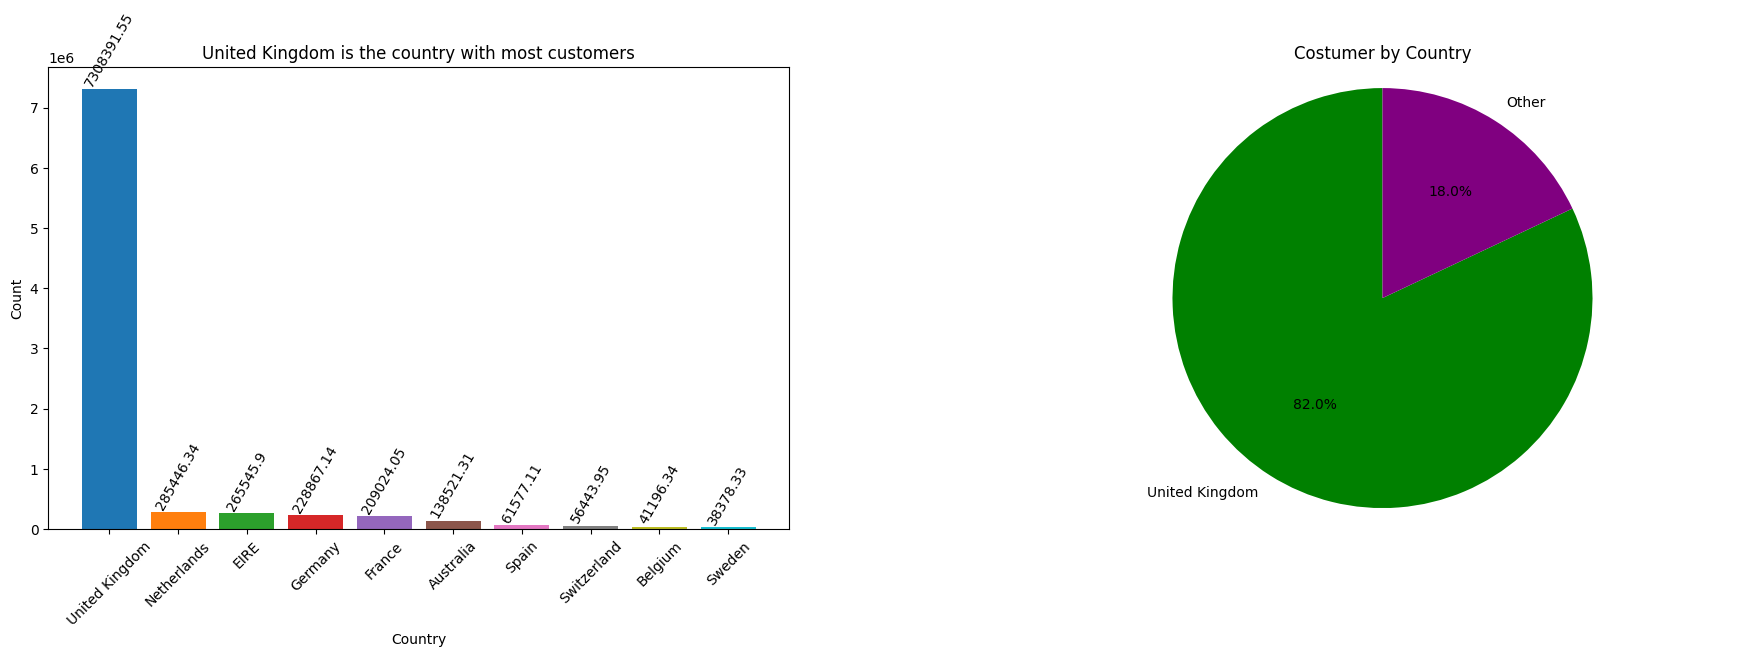

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

# Bar chart
top_countries = revenue_per_country.sort_values(ascending=False).head(10)
ax1.bar(top_countries.index, top_countries, color=plt.cm.tab10.colors)
ax1.set_title("United Kingdom is the country with most customers")
ax1.set_xlabel("Country")
ax1.set_ylabel("Count")
ax1.set_xticklabels(top_countries.index, rotation=45)
ax1.tick_params(axis='x', labelrotation=45)

for i, v in enumerate(top_countries):
    ax1.text(i, v, str(round(v, 2)), ha='center', va='bottom', rotation=60)

# Pie chart
top_countries = revenue_per_country.sort_values(ascending=False).head(1)
other_countries_revenue = revenue_per_country.sort_values(ascending=False).tail(len(revenue_per_country) - 1).sum()

pie_data = top_countries.copy()
pie_data['Other'] = other_countries_revenue

ax2.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90, colors=['green', 'purple'])
ax2.set_title("Costumer by Country")
ax2.axis('equal')

plt.subplots_adjust(wspace=0.3)

plt.show();

3. Visualize total cost per country

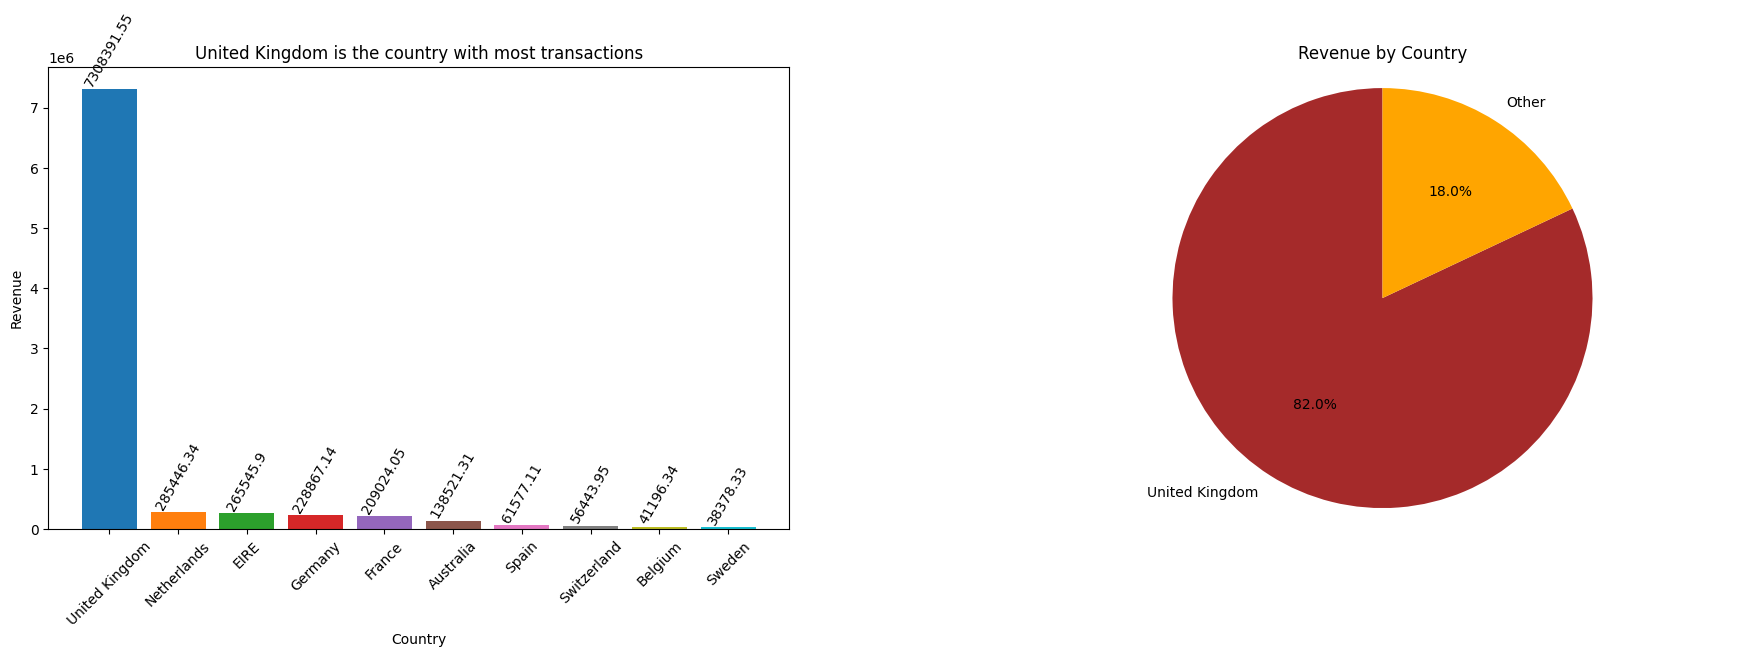

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

# Bar chart
top_countries = revenue_per_country.sort_values(ascending=False).head(10)
ax1.bar(top_countries.index, top_countries, color=plt.cm.tab10.colors)
ax1.set_title("United Kingdom is the country with most transactions")
ax1.set_xlabel("Country")
ax1.set_ylabel("Revenue")
ax1.set_xticklabels(top_countries.index, rotation=45)
ax1.tick_params(axis='x', labelrotation=45)

for i, v in enumerate(top_countries):
    ax1.text(i, v, str(round(v, 2)), ha='center', va='bottom', rotation=60)

# Pie chart
top_countries = revenue_per_country.sort_values(ascending=False).head(1)
other_countries_revenue = revenue_per_country.sort_values(ascending=False).tail(len(revenue_per_country) - 1).sum()

pie_data = top_countries.copy()
pie_data['Other'] = other_countries_revenue

ax2.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90, colors=['brown', 'orange'])
ax2.set_title("Revenue by Country")
ax2.axis('equal')

plt.subplots_adjust(wspace=0.3)

plt.show();

#### The UK not only has the most sales revenue, but also the most customers. Since the majority of this data set contains orders from the UK, we can explore the UK market further by finding out what products the customers buy together and any other buying behaviors to improve our sales and targeting strategy.

### vii. Explore the UK Market


1. Create df_uk DataFrame

In [47]:
df_uk = df[df.Country == "United Kingdom"]
df_uk.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  total_price  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom        15.30  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom        22.00  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34

2. What are the most popular products that are bought in the UK?

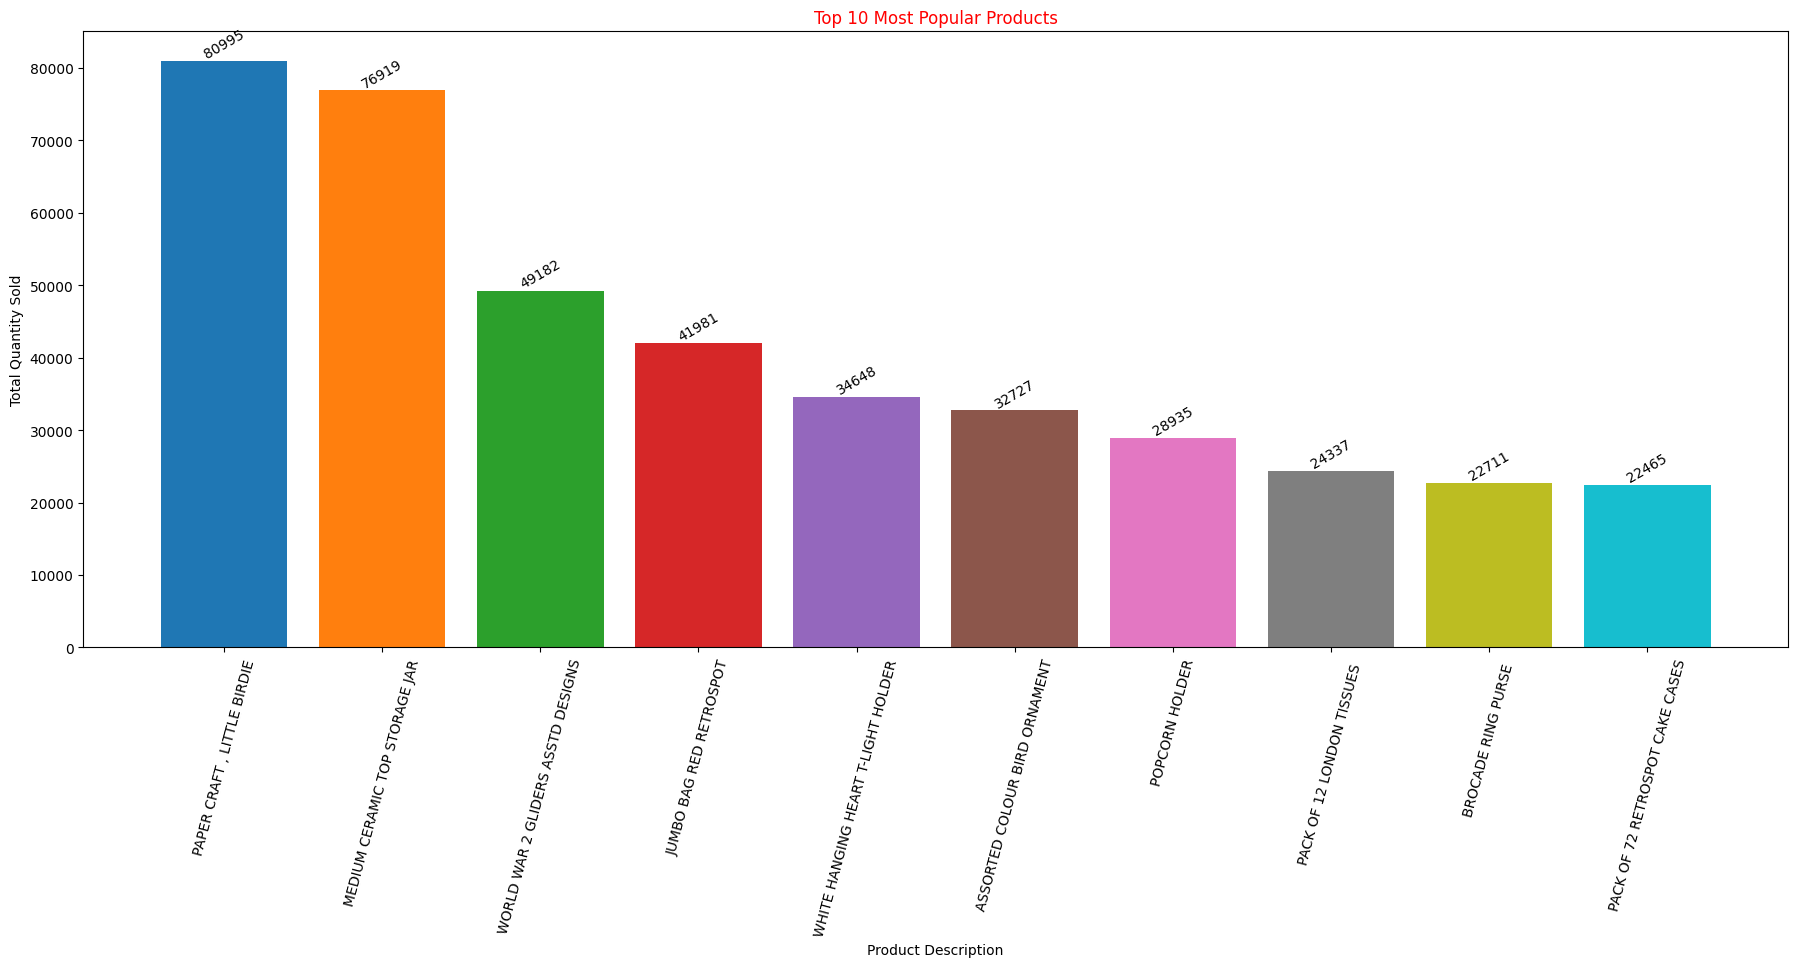

In [48]:
popular_products = df_uk.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
top_10_popular_products = popular_products.head(10)

plt.figure(figsize=(22, 8))

# Çubukları çizdirme
bars = plt.bar(top_10_popular_products.index, top_10_popular_products.values, color=plt.cm.tab10.colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', rotation=30)

plt.title('Top 10 Most Popular Products', fontdict={"color":"red"})
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=75)

plt.show()

### We will continue analyzing the UK transactions with customer segmentation.

# 2. RFM Analysis

In the age of the internet and e-commerce, companies that do not expand their businesses online or utilize digital tools to reach their customers will run into issues like scalability and a lack of digital precsence. An important marketing strategy e-commerce businesses use for analyzing and predicting customer value is customer segmentation. Customer data is used to sort customers into group based on their behaviors and preferences.

**[RFM](https://www.putler.com/rfm-analysis/) (Recency, Frequency, Monetary) Analysis** is a customer segmentation technique for analyzing customer value based on past buying behavior. RFM analysis was first used by the direct mail industry more than four decades ago, yet it is still an effective way to optimize your marketing.
<br>
<br>
Our goal in this Notebook is to cluster the customers in our data set to:
 - Recognize who are our most valuable customers
 - Increase revenue
 - Increase customer retention
 - Learn more about the trends and behaviors of our customers
 - Define customers that are at risk

We will start with **RFM Analysis** and then compliment our findings with predictive analysis using **K-Means Clustering Algorithms.**

- RECENCY (R): Time since last purchase
- FREQUENCY (F): Total number of purchases
- MONETARY VALUE (M): Total monetary value




Benefits of RFM Analysis

- Increased customer retention
- Increased response rate
- Increased conversion rate
- Increased revenue

RFM Analysis answers the following questions:
 - Who are our best customers?
 - Who has the potential to be converted into more profitable customers?
 - Which customers do we need to retain?
 - Which group of customers is most likely to respond to our marketing campaign?
 

### i. Import Libraries

In [49]:
import datetime

### ii. Review df_uk DataFrame

In [50]:
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    354345 non-null  object 
 1   StockCode    354345 non-null  object 
 2   Description  354345 non-null  object 
 3   Quantity     354345 non-null  int64  
 4   InvoiceDate  354345 non-null  object 
 5   UnitPrice    354345 non-null  float64
 6   CustomerID   354345 non-null  float64
 7   Country      354345 non-null  object 
 8   total_price  354345 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 27.0+ MB


In [51]:
df_uk.InvoiceDate = pd.to_datetime(df_uk['InvoiceDate'])
df_uk.CustomerID = df_uk.CustomerID.astype('int')
df_uk.InvoiceNo = df.InvoiceNo.astype('int')

In [52]:
df_uk.head()

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  total_price  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom        15.30  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom        20.34  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom        22.00  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom        20.34  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom        20.34

### iii. Recency: Days since last purchase
To calculate the recency values, follow these steps in order:

1. To calculate recency, we need to choose a date as a point of reference to evaluate how many days ago was the customer's last purchase.
2. Create a new column called Date which contains the invoice date without the timestamp
3. Group by CustomerID and check the last date of purchase
4. Calculate the days since last purchase
5. Drop Last_Purchase_Date since we don't need it anymore
6. Plot RFM distributions

1. Choose the last date in the data set as a point of reference to evaluate how many days ago was the customer's last purchase.

In [53]:
df_uk.InvoiceDate.describe()
# Since the last date in our data is 2011-12-09, we determine the current date as 2011-12-10.

count                  354345
unique                  15615
top       2011-11-14 15:27:00
freq                      542
first     2010-12-01 08:26:00
last      2011-12-09 12:49:00
Name: InvoiceDate, dtype: object

In [54]:
current_date = datetime.date(2011, 12, 10)

2. Create a new column called Date which contains the invoice date without the timestamp

In [55]:
df_uk['Date'] = pd.to_datetime(df_uk['InvoiceDate']).dt.date

In [56]:
df_uk.sample(4, random_state=101)

InvoiceNo StockCode                     Description  Quantity  \
37840      539484     21929  JUMBO BAG PINK VINTAGE PAISLEY         1   
358534     568152     22561     WOODEN SCHOOL COLOURING SET         6   
107191     545416     22852          DOG BOWL VINTAGE CREAM         4   
284253     561868     22382      LUNCH BAG SPACEBOY DESIGN          3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
37840  2010-12-19 15:44:00       1.95       15640  United Kingdom   
358534 2011-09-25 11:40:00       1.65       16480  United Kingdom   
107191 2011-03-02 13:35:00       4.25       17770  United Kingdom   
284253 2011-07-31 11:26:00       1.65       16813  United Kingdom   

        total_price        Date  
37840          1.95  2010-12-19  
358534         9.90  2011-09-25  
107191        17.00  2011-03-02  
284253         4.95  2011-07-31

3. Group by CustomerID and check the last date of purchase

In [57]:
# create a df that show the last purchase date for each customer
df_recency = df_uk.groupby("CustomerID")[["Date"]].max()
df_recency.rename(columns={'Date':'last_purchase_date'}, inplace=True)
df_recency

last_purchase_date
CustomerID                   
12346              2011-01-18
12747              2011-12-07
12748              2011-12-09
12749              2011-12-06
12820              2011-12-06
...                       ...
18280              2011-03-07
18281              2011-06-12
18282              2011-12-02
18283              2011-12-06
18287              2011-10-28

[3921 rows x 1 columns]

4. Calculate the days since last purchase

In [58]:
day_diff = current_date - df_recency['last_purchase_date']
df_recency['Recency'] = pd.to_timedelta(day_diff).dt.days

In [59]:
df_recency.head()

last_purchase_date  Recency
CustomerID                            
12346              2011-01-18      326
12747              2011-12-07        3
12748              2011-12-09        1
12749              2011-12-06        4
12820              2011-12-06        4

5. Drop Last_Purchase_Date since we don't need it anymore

In [60]:
df_recency.drop(columns=['last_purchase_date'], axis=1, inplace=True)

In [61]:
df_recency

Recency
CustomerID         
12346           326
12747             3
12748             1
12749             4
12820             4
...             ...
18280           278
18281           181
18282             8
18283             4
18287            43

[3921 rows x 1 columns]

6. Plot RFM distributions

In [62]:
# check the number of customers who made an order in last 2 months
df_recency[df_recency.Recency <60]

Recency
CustomerID         
12747             3
12748             1
12749             4
12820             4
12826             3
...             ...
18276            44
18277            59
18282             8
18283             4
18287            43

[2131 rows x 1 columns]

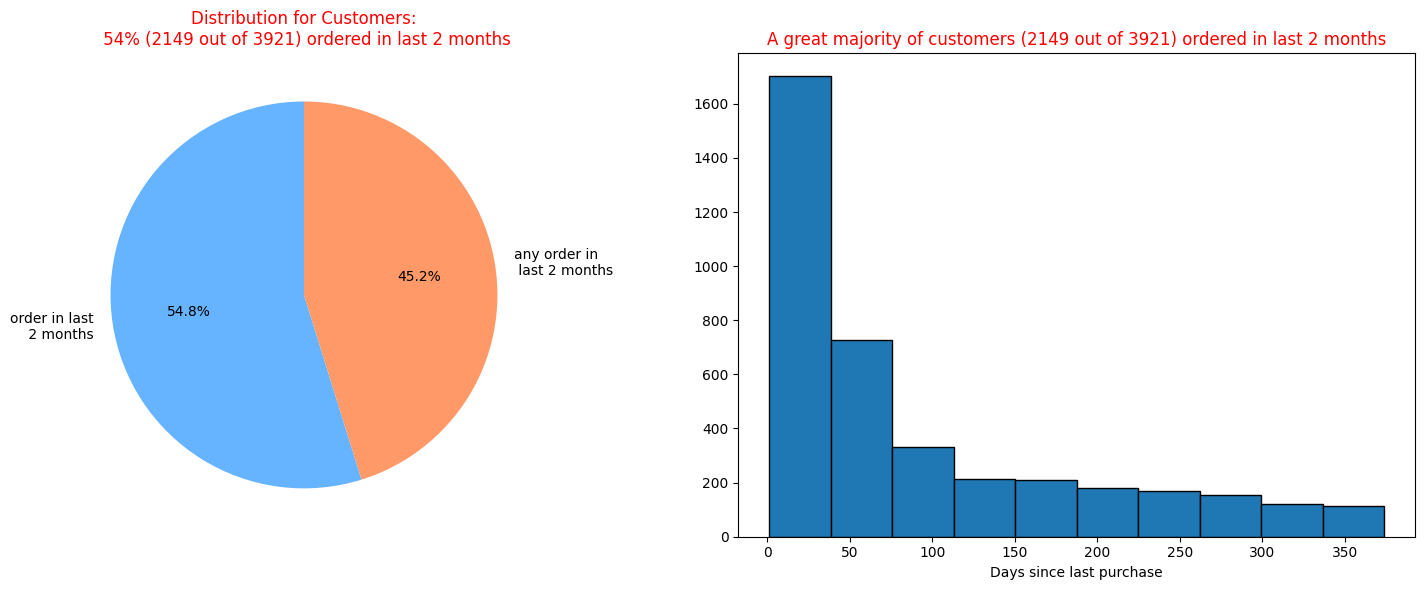

In [63]:
# Create a figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Show the distribution of customers who ordered in last 2 months and not
labels = ['order in last\n 2 months', 'any order in\n last 2 months']
sizes = [2149, 3921 - 2149]  # 2149 customers with orders in the last 2 months, remaining customers without orders
colors = ['#66b3ff', '#ff9968']

# Pie chart
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
# Aspect ratio to make the pie chart a circle
ax1.set_title('Distribution for Customers:\n 54% (2149 out of 3921) ordered in last 2 months', fontdict={"color": "red"})

# plot the distribution of customers in terms of the days since the last purchase
ax2.hist(df_recency.Recency, bins=10, edgecolor='black')
ax2.set_xlabel("Days since last purchase")
ax2.set_title("A great majority of customers (2149 out of 3921) ordered in last 2 months", fontdict={"color": "red"})

plt.tight_layout()
plt.show()

### iv. Frequency: Number of purchases

To calculate how many times a customer purchased something, we need to count how many invoices each customer has. To calculate the frequency values, follow these steps in order:

1. Make a copy of df_uk and drop duplicates

In [64]:
df_uk0 = df_uk.copy()

In [65]:
# check and drop the number of duplicates
df_uk.duplicated().sum()

5118

In [66]:
# drop them
df_uk.drop_duplicates(inplace=True)
df_uk.duplicated().sum()

0

2. Calculate the frequency of purchases

In [67]:
df_frequency = df_uk.groupby("CustomerID")[["InvoiceNo"]].nunique()
df_frequency = df_frequency.rename(columns={'InvoiceNo': 'Frequency'})
df_frequency

Frequency
CustomerID           
12346               1
12747              11
12748             210
12749               5
12820               4
...               ...
18280               1
18281               1
18282               2
18283              16
18287               3

[3921 rows x 1 columns]

3. Plot RFM distributions

In [68]:
df_frequency[df_frequency.Frequency<=10]
# df_frequency[df_frequency.frequency<10] = 3566
# df_frequency[df_frequency.frequency<15] = 3749

Frequency
CustomerID           
12346               1
12749               5
12820               4
12821               1
12822               2
...               ...
18278               1
18280               1
18281               1
18282               2
18287               3

[3612 rows x 1 columns]

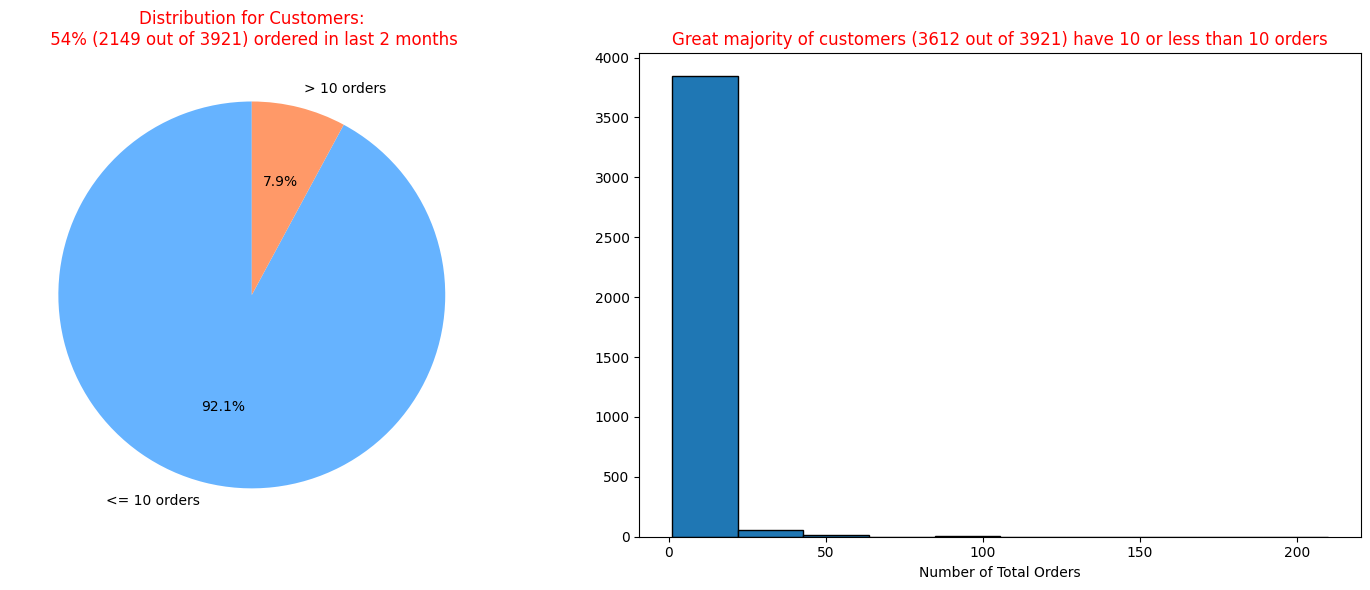

In [69]:
# Create a figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Show the distribution of customers with more or less than 10 orders in a pie chart
labels = ['<= 10 orders', '> 10 orders']
sizes = [3612, 3921 - 3612]  # 3612 customers with <= 10 orders, remaining customers with > 10 orders
colors = ['#66b3ff', '#ff9968']  # Blue for <= 10 orders, orange for > 10 orders

# Pie chart
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
# Aspect ratio to make the pie chart a circle
ax1.set_title('Distribution for Customers:\n 54% (2149 out of 3921) ordered in last 2 months', fontdict={"color": "red"})

# plot the distribution of customers in terms of their total orders
ax2.hist(df_frequency.Frequency, bins=10, edgecolor='black')
ax2.set_xlabel("Number of Total Orders")
ax2.set_title("Great majority of customers (3612 out of 3921) have 10 or less than 10 orders", fontdict={"color": "red"})

plt.tight_layout()
plt.show()

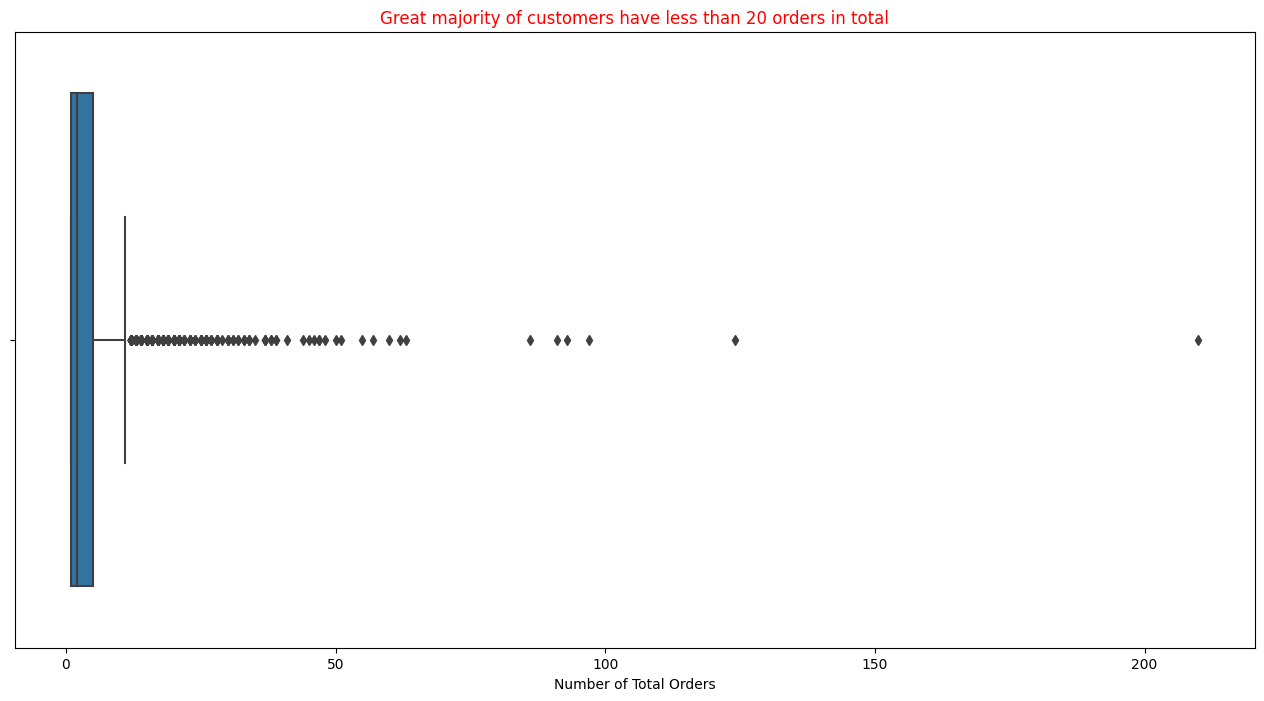

In [70]:
# check the distribution of the frequency with a boxplot
plt.figure(figsize=(16,8))
sns.boxplot(data=df_frequency, x= "Frequency")
plt.xlabel("Number of Total Orders")
plt.title("Great majority of customers have less than 20 orders in total", fontdict={"color":"red"})
plt.show()

### v. Monetary: Total amount of money spent

The monetary value is calculated by adding together the cost of the customers' purchases.


1. Calculate sum total cost by customers and named "Monetary"

In [71]:
df_monetary = df_uk.groupby("CustomerID")[["total_price"]].sum()
df_monetary = df_monetary.rename(columns={'total_price': 'Monetary'})
df_monetary

Monetary
CustomerID          
12346       77183.60
12747        4196.01
12748       33053.19
12749        4090.88
12820         942.34
...              ...
18280         180.60
18281          80.82
18282         178.05
18283        2045.53
18287        1837.28

[3921 rows x 1 columns]

In [72]:
# check main statistics of monetary feature
df_monetary.Monetary.describe()
# insights: std > mean. A comparison of min-25% and 75%-max show that there are extreme data points in upper
# part of the feature

count      3921.000000
mean       1857.950687
std        7477.736186
min           0.000000
25%         298.110000
50%         644.300000
75%        1570.810000
max      259657.300000
Name: Monetary, dtype: float64

2. Plot RFM distributions

In [73]:
df_monetary[df_monetary.Monetary<5000]

Monetary
CustomerID          
12747        4196.01
12749        4090.88
12820         942.34
12821          92.72
12822         948.88
...              ...
18280         180.60
18281          80.82
18282         178.05
18283        2045.53
18287        1837.28

[3694 rows x 1 columns]

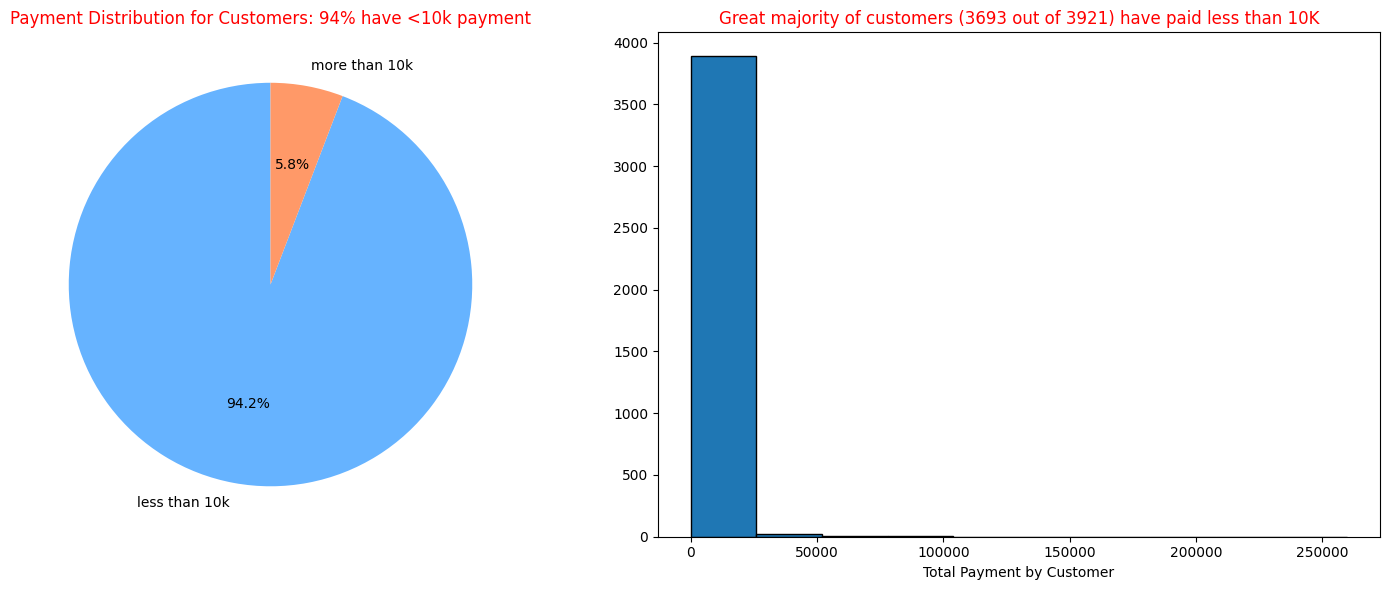

In [74]:
# Create a figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Show the distribution of customers in terms of their payment (10k)
labels = ['less than 10k', 'more than 10k']
sizes = [3693, 3921 - 3693]  
colors = ['#66b3ff', '#ff9968']  # Blue for < 10k payments, Orange for > 10k 

# Pie chart
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
# Aspect ratio to make the pie chart a circle
ax1.set_title('Payment Distribution for Customers: 94% have <10k payment', fontdict={"color": "red"})

# plot the distribution of customers in terms of their total payments
ax2.hist(df_monetary.Monetary, bins=10, edgecolor='black')
ax2.set_xlabel("Total Payment by Customer")
ax2.set_title("Great majority of customers (3693 out of 3921) have paid less than 10K", fontdict={"color": "red"})

plt.tight_layout()
plt.show()

### vi. Create RFM Table
Merge the recency, frequency and motetary dataframes

In [75]:
# combine tables: recency, frequency and monetary
df_rfm = df_recency.join([df_frequency, df_monetary])
df_rfm

Recency  Frequency  Monetary
CustomerID                              
12346           326          1  77183.60
12747             3         11   4196.01
12748             1        210  33053.19
12749             4          5   4090.88
12820             4          4    942.34
...             ...        ...       ...
18280           278          1    180.60
18281           181          1     80.82
18282             8          2    178.05
18283             4         16   2045.53
18287            43          3   1837.28

[3921 rows x 3 columns]

In [76]:
df_rfm.shape

(3921, 3)

In [77]:
df_rfm.describe().T

count         mean          std  min     25%    50%      75%  \
Recency    3921.0    92.722265    99.528532  1.0   18.00   51.0   143.00   
Frequency  3921.0     4.246111     7.205750  1.0    1.00    2.0     5.00   
Monetary   3921.0  1857.950687  7477.736186  0.0  298.11  644.3  1570.81   

                max  
Recency       374.0  
Frequency     210.0  
Monetary   259657.3

In [78]:
# get the monetary with 0 payment
df_rfm[df_rfm.Monetary ==0]

Recency  Frequency  Monetary
CustomerID                              
13256            15          1       0.0

In [79]:
# check its order details
df[df.CustomerID == 13256]
# despite 12540 pieces of product, the payment made is 0. It seems as an entry-mistake and will be removed

InvoiceNo StockCode                     Description  Quantity  \
502122    578841     84826  ASSTD DESIGN 3D PAPER STICKERS     12540   

                InvoiceDate  UnitPrice  CustomerID         Country  \
502122  2011-11-25 15:57:00        0.0     13256.0  United Kingdom   

        total_price  
502122          0.0

In [80]:
# drop it
df_rfm.drop(13256, inplace=True)

In [81]:
# check the new shape
df_rfm.shape

(3920, 3)

# 3. Customer Segmentation with RFM Scores

Businesses have this ever-lasting urge to understand their customers. The better you understand the customer, the better you serve them, and the higher the financial gain you receive from that customer. Since the dawn of trade, this process of understanding customers for a strategic gain has been there practiced and this task is known majorly as [Customer Segmentation](https://clevertap.com/blog/rfm-analysis/).
Well as the name suggests, Customer Segmentation could segment customers according to their precise needs. Some of the common ways of segmenting customers are based on their Recency-Frequency-Monatory values, their demographics like gender, region, country, etc, and some of their business-crafted scores. You will use Recency-Frequency-Monatory values for this case.

In this section, you will create an RFM Segmentation Table where you segment your customers by using the RFM table. For example, you can label the best customer as "Big Spenders" and the lost customer as "Lost Customer".

## Calculate RFM Scoring

The simplest way to create customer segments from an RFM model is by using **Quartiles**. We will assign a score from 1 to 4 to each category (Recency, Frequency, and Monetary) with 4 being the highest/best value. The final RFM score is calculated by combining all RFM values. For Customer Segmentation, you will use the df_rfm data set resulting from the RFM analysis.
<br>
<br>
**Note**: Data can be assigned into more groups for better granularity, but we will use 4 in this case.

1. Divide the df_rfm into quarters

In [82]:
# Calculate quartiles for Recency, Frequency, and Monetary
quantiles = df_rfm.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 143.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 298.185, 0.5: 644.9749999999999, 0.75: 1571.2849999999999}}

RFM skorlarini kullanarak 2 yolla segment anallizi yapabiliriz; bunlardan bir tanesi her musteri icin 3 skoru alip toplar ve genel bir skora ulasarak bu skorlardan musterileri segmnetlere ayirabiliriz (asagida raw hucre). Sektorde yaygin kullanilan bir diger yontem ise RFm skorlarina gore musterileri 111-322-444 vb her skoru yanyana getirecek sekilde gruplayarak bunun uzeirnden segmentler belirleme ve stratejiler olusturmadir. Calismada bu yontemle devam edilecektir.

### i. Creating the RFM Segmentation Table


1. Create two functions, one for Recency and one for Frequency and Monetary. For Recency, customers in the first quarter should be scored as 4, this represents the highest Recency value. Conversely, for Frequency and Monetary, customers in the last quarter should be scored as 4, representing the highest Frequency and Monetary values.

In [83]:
def recency(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
def freq_mon(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

2. Score customers from 1 to 4 by applying the functions you have created. Also create separate score column for each value. 

In [84]:
df_rfm["R_Score"] = df_rfm.Recency.apply(recency, args=('Recency', quantiles))
df_rfm["F_Score"] = df_rfm.Frequency.apply(freq_mon, args=('Frequency', quantiles))
df_rfm["M_Score"] = df_rfm.Monetary.apply(freq_mon, args=('Monetary', quantiles))
df_rfm

Recency  Frequency  Monetary  R_Score  F_Score  M_Score
CustomerID                                                         
12346           326          1  77183.60        1        1        4
12747             3         11   4196.01        4        4        4
12748             1        210  33053.19        4        4        4
12749             4          5   4090.88        4        3        4
12820             4          4    942.34        4        3        3
...             ...        ...       ...      ...      ...      ...
18280           278          1    180.60        1        1        1
18281           181          1     80.82        1        1        1
18282             8          2    178.05        4        2        1
18283             4         16   2045.53        4        4        4
18287            43          3   1837.28        3        3        4

[3920 rows x 6 columns]

3. Now that scored each customer, you'll combine the scores for segmentation.

In [85]:
#RFM - The value of 2 different variables that were formed was recorded as a RFM_SCORE
df_rfm["RFM_scores"] = (df_rfm["R_Score"].astype(str) + df_rfm["F_Score"].astype(str) + 
                       df_rfm["M_Score"].astype(str))

In [86]:
df_rfm.RFM_scores.unique()
# 4x4x4 = max 63, we have 62 groups

array(['114', '444', '434', '433', '111', '223', '234', '212', '443',
       '432', '121', '344', '322', '112', '323', '134', '244', '132',
       '313', '211', '233', '123', '144', '222', '122', '332', '423',
       '333', '312', '311', '334', '411', '412', '421', '213', '124',
       '113', '232', '231', '331', '422', '431', '343', '321', '243',
       '224', '221', '324', '214', '133', '131', '424', '413', '142',
       '414', '143', '442', '314', '242', '441', '141'], dtype=object)

**What does rfm_score mean?**

A score of 444 means the highest score for customers who order frequently, pays a lot and have already purchased recently.

On the contrary, a score of 111, for example, means that these customers pay little, order rarely and have not ordered for a long time. 

Below is a table to explain main ideas of a RFM segmentation. [Source](https://www.blastanalytics.com/blog/rfm-analysis-boosts-sales)

| Segment | RFM | Description | Marketing |
| --- | --- | --- | --- |
| Best Customers | 444 | Bought most recently and most often, and spend the most | No price incentives, new products, and loyalty programs
| --- | --- | --- | --- |
| Loyal Customers | X4X | Buy most frequently | Use R and M to further segment |
| --- | --- | --- | --- |
| Big Spenders | XX4 | Spend the most | Market your most expensive products |
| --- | --- | --- | --- |
| Almost Lost | 244 | Haven’t purchased for some time, but purchased frequently and spend the most | Aggressive price incentives |
| --- | --- | --- | --- |
|Lost Customers | 144 | Haven’t purchased for some time, but purchased frequently and spend the most | Aggressive price incentives |
| --- | --- | --- | --- |
| Lost Cheap Customers | 111 | Last purchased long ago, purchased few, and spent little | Don’t spend too much trying to re-acquire |


After a research also on other sources about the specific RFM analysis, I have decided to segment the customers in this data as below. This segmentation decision mainly based on the assumption that the copany targets to increase the loyalt of their customers and thus label their customers mostly in a kind of "lost" segment if they have any doubts.

1) Best Customers (Core): These are the customers who have recently made frequent purchases with high monetary value. They are the most valuable and active customers.
2) Loyal Customers: These customers have made frequent purchases with high (and middle) monetary value, but their rmf may not be the same with the Best Customers. They are highly loyal and continue to contribute significantly to the business. (can be also divided into subsegments according to monetary scores)
3) Potential Customers (Promising): These customers have made recent purchases, but their frequency and monetary value may be relatively lower or volatile. They show potential to become more valuable customers with increased engagement. (can also be divided into subsegment according to frequency scores)
4) At-Risk Customers (Almost Lost): These customers have not made recent purchases, but their historical frequency and monetary value were high. They are at risk of becoming disengaged or lost customers if no action is taken to re-engage them. Since the company targets mainly this group, thus they ask to prepare this group as big as possible (in other words, any customer with doubt goes into this group)
5) Lost Customers: These customers have low recency, frequency, and monetary value. They haven't made a purchase for a long time and are considered lost. Targeted efforts may be required to win them back.
6) Churned Customers: These customers have low recency, frequency, and monetary value, similar to the Lost Customers. However, they have already churned, meaning they have stopped being customers altogether.


Here's the mapping of RFM scores to the segments:

- Core: 444
- Loyal: 443, 343, 344, 434, 433, 334, 442
- Potential Customers (Promising): 431, 441, 423, 342, 432, 424, 314, 414, 413, 421, 422, 411, 322, 323
- Almost Lost: 234, 243, 244, 233, 242, 313, 312, 324, 333, 332, 331, 232, 231, 133, 143, 412, 132, 134, 144, 141, 142, 311, 321, 213
- Lost Customers: 222, 223, 224, 214, 212, 211, 221, '131', 121,122, 123, 124
- Churned customers: 111, 112, 113, 114

It should be said that, there are many methods and ways to segment the customers in a RFM analysis. The biggest determinant in such an analysis is always the needs of the clients and the conditions of the related industries (or demographic caharacteristics of the customers; social and economic conditions of the region in which the company is located and so on). Therefore, the segmentation and categorisation of the customers completely depends on the data related to the task. Therefore, we can adjust the segment names and definitions according to the specific industry and business context. To give an example, you can not expect your customers visit the company frequently to buy a product if you are selling autos; however, you should give attention to a customer if they do not buy any products in last 2 weeks if you manage a grocery shop.


4. Define rfm_level function that tags customers by using RFM_Scrores and Create a new variable RFM_Level

In [87]:
def rfm_level(row):
    rfm_scores = str(row['RFM_scores'])
    if rfm_scores == '444':
        return 'Core'
    elif rfm_scores in ['443', '343', '344', '434', '433', '334', '442']:
        return 'Loyal'
    elif rfm_scores in ['431', '441', '423', '342', '432', '424', '314', '414', '413', '421', '422', '411', '322', '323']:
        return 'Promising'
    elif rfm_scores in ['234', '243', '244', '233', '242', '313', '312', '324', '333', '332', '331', '232', '231', '133', '143', '412', '132', '134', '144', '141', '142', '311', '321', '213']:
        return 'Almost-Lost'
    elif rfm_scores in ['222', '223', '224', '214', '212', '211', '221', '131', '121', '122', '123', '124']:
        return 'Lost'
    elif rfm_scores in ['111', '112', '113', '114']:
        return 'Churned'
    else:
        return 'Other'

In [88]:
# Create a new variable rfm_Level
df_rfm['rfm_level'] = df_rfm.apply(rfm_level, axis=1)

In [89]:
df_rfm

Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
CustomerID                                                            
12346           326          1  77183.60        1        1        4   
12747             3         11   4196.01        4        4        4   
12748             1        210  33053.19        4        4        4   
12749             4          5   4090.88        4        3        4   
12820             4          4    942.34        4        3        3   
...             ...        ...       ...      ...      ...      ...   
18280           278          1    180.60        1        1        1   
18281           181          1     80.82        1        1        1   
18282             8          2    178.05        4        2        1   
18283             4         16   2045.53        4        4        4   
18287            43          3   1837.28        3        3        4   

           RFM_scores  rfm_level  
CustomerID                        
12346             114    Churned  
12747             444       Core  
12748             444       Core  
12749             434      Loyal  
12820             433      Loyal  
...               ...        ...  
18280             111    Churned  
18281             111    Churned  
18282             421  Promising  
18283             444       Core  
18287             334      Loyal  

[3920 rows x 8 columns]

In [90]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3920 entries, 12346 to 18287
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Recency     3920 non-null   int64  
 1   Frequency   3920 non-null   int64  
 2   Monetary    3920 non-null   float64
 3   R_Score     3920 non-null   int64  
 4   F_Score     3920 non-null   int64  
 5   M_Score     3920 non-null   int64  
 6   RFM_scores  3920 non-null   object 
 7   rfm_level   3920 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 275.6+ KB


5. Calculate average values for each RFM_Level, and return a size of each segment 

In [91]:
# first convert the dtypes
df_rfm.RFM_scores = df_rfm.RFM_scores.astype("int")

In [92]:
# Calculate average values for each rfm_Level
rfm_segment_avg = df_rfm.groupby("rfm_level").agg({
    'R_Score': 'mean',
    'F_Score': 'mean',
    'M_Score': 'mean',
    'RFM_scores' : 'mean'
    
})

rfm_segment_avg

R_Score   F_Score   M_Score  RFM_scores
rfm_level                                            
Almost-Lost  2.440572  2.499553  2.571046  271.623771
Churned      1.000000  1.000000  1.455814  111.455814
Core         4.000000  4.000000  4.000000  444.000000
Lost         1.710907  1.572930  1.864652  188.684625
Loyal        3.512069  3.444828  3.560345  389.215517
Promising    3.645408  1.979592  2.061224  386.397959

In [93]:
# Get the size of each segment
rfm_segment_size = df_rfm['rfm_level'].value_counts()
rfm_segment_size.columns = ['rfm_level', 'segment_size']

# Print the average values and segment sizes
print("Average Values for Each RFM_Level:")
display(rfm_segment_avg)
print("\nSegment Sizes:")
display(rfm_segment_size)

Average Values for Each RFM_Level:


R_Score   F_Score   M_Score  RFM_scores
rfm_level                                            
Almost-Lost  2.440572  2.499553  2.571046  271.623771
Churned      1.000000  1.000000  1.455814  111.455814
Core         4.000000  4.000000  4.000000  444.000000
Lost         1.710907  1.572930  1.864652  188.684625
Loyal        3.512069  3.444828  3.560345  389.215517
Promising    3.645408  1.979592  2.061224  386.397959


Segment Sizes:


Almost-Lost    1119
Lost            761
Churned         645
Loyal           580
Core            423
Promising       392
Name: rfm_level, dtype: int64

## Plot RFM Segments

1. Create your plot and resize it.

Using customer segmentation categories found [here](http://www.blastam.com/blog/rfm-analysis-boosts-sales). We can formulate different marketing strategies and approaches for customer engagement for each type of customer.

Note: The author in the article scores 1 as the highest and 4 as the lowest

In [94]:
rfm_segment_avg

R_Score   F_Score   M_Score  RFM_scores
rfm_level                                            
Almost-Lost  2.440572  2.499553  2.571046  271.623771
Churned      1.000000  1.000000  1.455814  111.455814
Core         4.000000  4.000000  4.000000  444.000000
Lost         1.710907  1.572930  1.864652  188.684625
Loyal        3.512069  3.444828  3.560345  389.215517
Promising    3.645408  1.979592  2.061224  386.397959

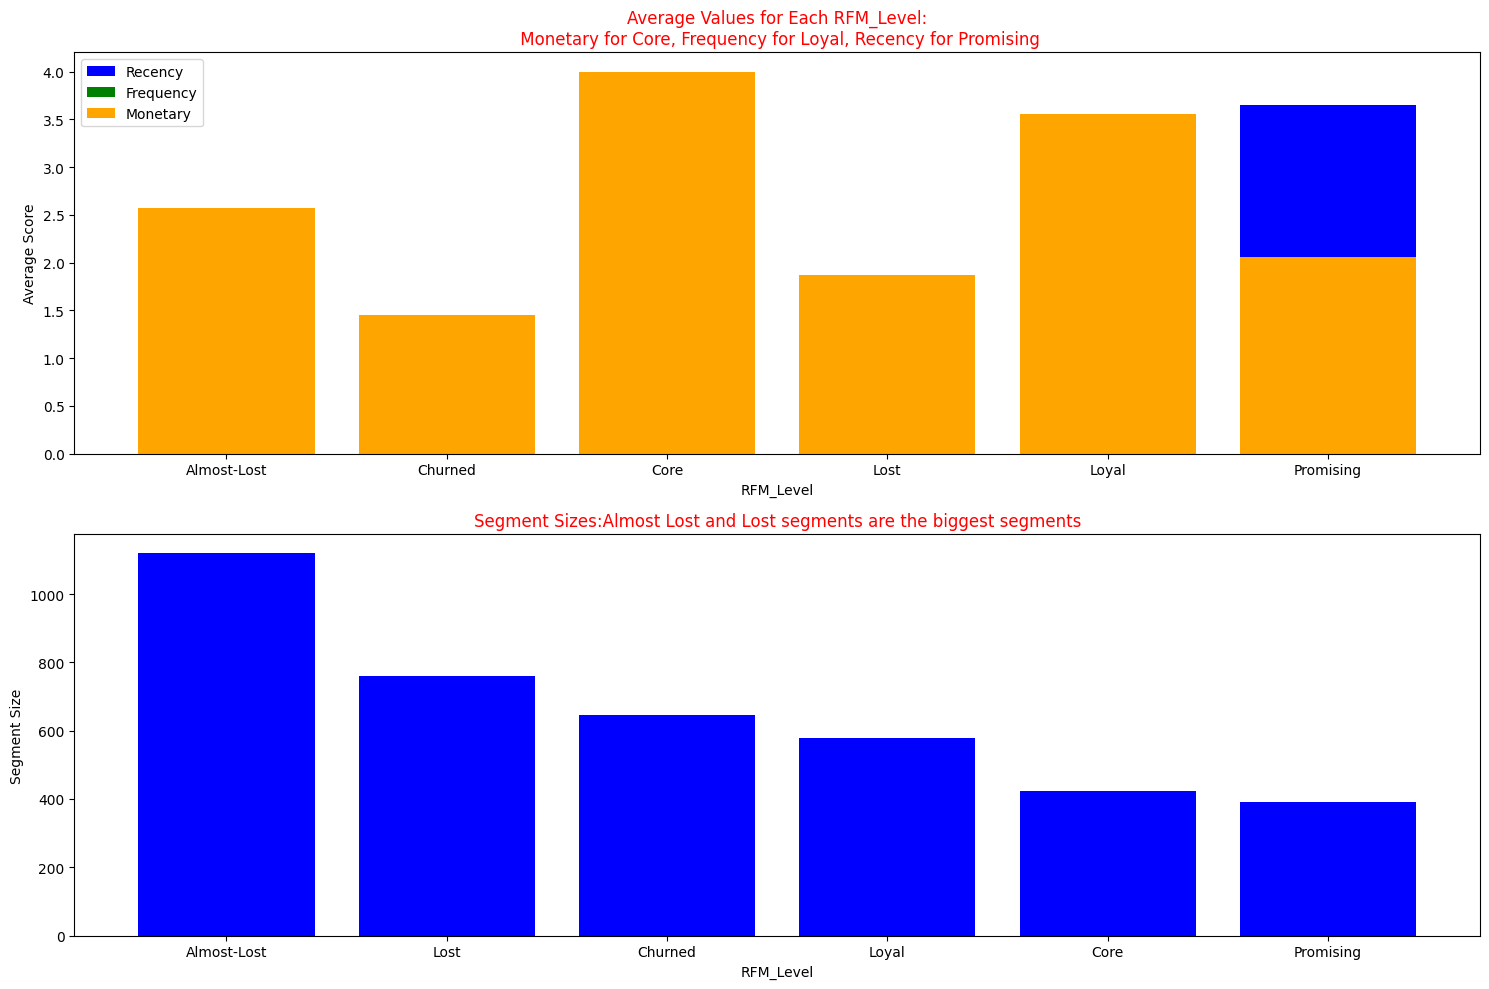

In [95]:
# Create a stack bar to visualize r-f-m separately for each segment
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.bar(rfm_segment_avg.index, rfm_segment_avg['R_Score'], color='blue', label='Recency')
plt.bar(rfm_segment_avg.index, rfm_segment_avg['F_Score'], color='green', label='Frequency')
plt.bar(rfm_segment_avg.index, rfm_segment_avg['M_Score'], color='orange', label='Monetary')
plt.xlabel('RFM_Level')
plt.ylabel('Average Score')
plt.title('Average Values for Each RFM_Level:\n Monetary for Core, Frequency for Loyal, \
Recency for Promising', fontdict={"color":"red"})
plt.legend()

# Visualize the segment size
plt.subplot(2, 1, 2)
plt.bar(rfm_segment_size.index, rfm_segment_size.values, color='blue')
plt.xlabel('RFM_Level')
plt.ylabel('Segment Size')
plt.title('Segment Sizes:Almost Lost and Lost segments are the biggest segments', fontdict={"color":"red"})

plt.tight_layout()
plt.show()


2. How many customers do we have in each segment?

In [96]:
df_rfm.groupby("rfm_level")[['Recency']].count()

Recency
rfm_level           
Almost-Lost     1119
Churned          645
Core             423
Lost             761
Loyal            580
Promising        392

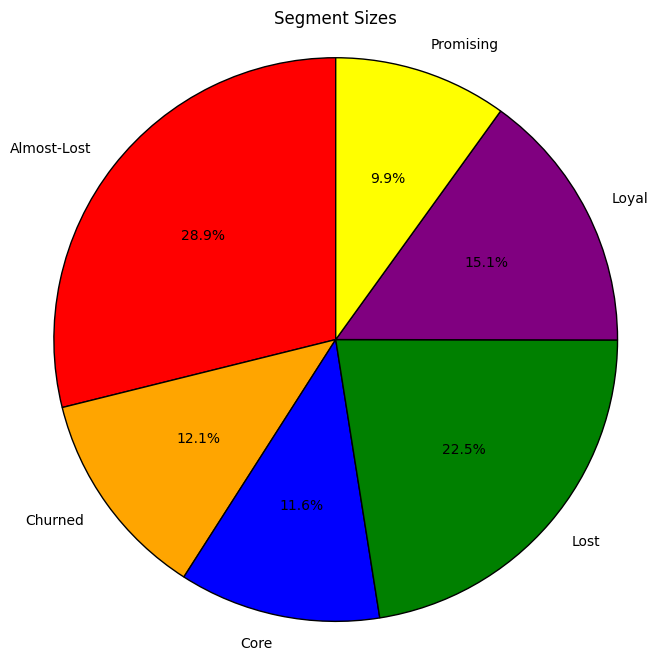

In [97]:
# display the number of customers for each segment with a pie chart
sizes = [1132, 473, 453, 881, 591, 390]
labels = ['Almost-Lost', 'Churned', 'Core', 'Lost', 'Loyal', 'Promising']
colors = ['red', 'orange', 'blue', 'green', 'purple', 'yellow']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,
        wedgeprops={'linewidth': 1, 'edgecolor': 'black'})

plt.title('Segment Sizes')
plt.axis('equal')
plt.show()

# 3. Applying K-Means Clustering

Now that we have our customers segmented into different categories, we can gain further insight into customer behavior by using predictive models in conjuction with out RFM model.
Possible algorithms include **Logistic Regression**, **K-means Clustering**, and **K-nearest Neighbor**. We will go with [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) since we already have our distinct groups determined. K-means has also been widely used for market segmentation and has the advantage of being simple to implement.

## Data Pre-Processing and Exploring

In [98]:
df_kmeans = df_rfm[["Recency", "Frequency", "Monetary"]]
df_kmeans.head()

Recency  Frequency  Monetary
CustomerID                              
12346           326          1  77183.60
12747             3         11   4196.01
12748             1        210  33053.19
12749             4          5   4090.88
12820             4          4    942.34

In [99]:
df_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3920 entries, 12346 to 18287
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    3920 non-null   int64  
 1   Frequency  3920 non-null   int64  
 2   Monetary   3920 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 122.5 KB


In [100]:
# main statistics: mean&std comparison - min&25% and 75% and max comparison
df_kmeans.describe()
# std is higher than mean for every features. check outliers

Recency    Frequency       Monetary
count  3920.000000  3920.000000    3920.000000
mean     92.742092     4.246939    1858.424654
std      99.533485     7.206483    7478.631256
min       1.000000     1.000000       3.750000
25%      18.000000     1.000000     298.185000
50%      51.000000     2.000000     644.975000
75%     143.000000     5.000000    1571.285000
max     374.000000   210.000000  259657.300000

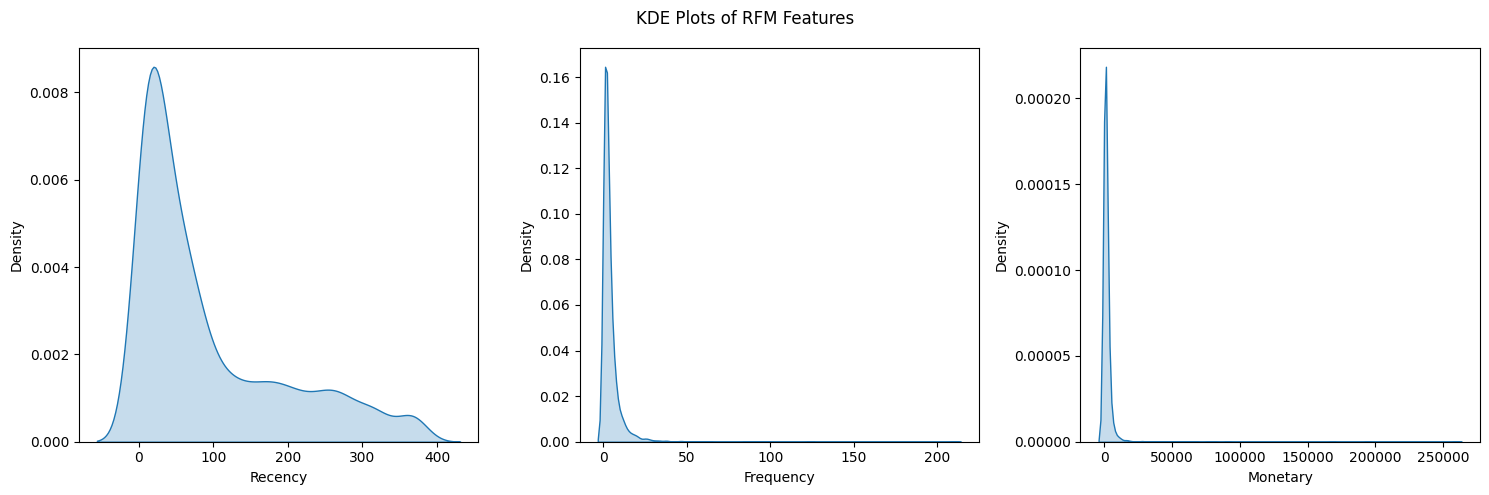

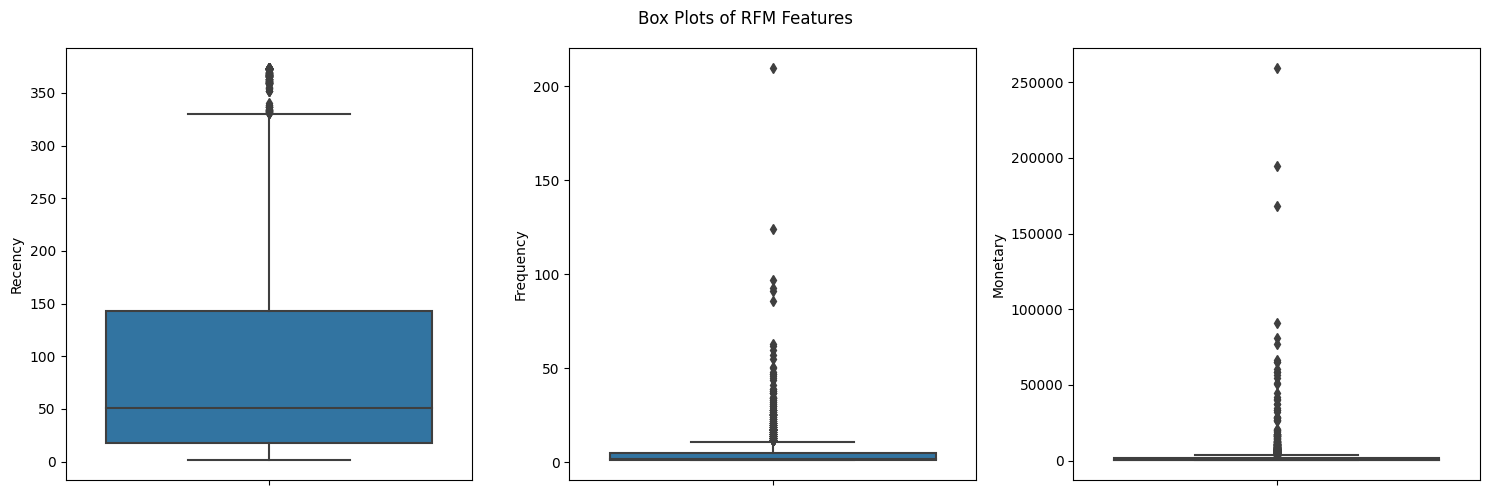

In [101]:
# let's create kdeplots to see the distribution for each feature
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.kdeplot(ax=axes[0], data=df_kmeans['Recency'], shade=True)
axes[0].set_xlabel('Recency')
axes[0].set_ylabel('Density')

sns.kdeplot(ax=axes[1], data=df_kmeans['Frequency'], shade=True)
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Density')

sns.kdeplot(ax=axes[2], data=df_kmeans['Monetary'], shade=True)
axes[2].set_xlabel('Monetary')
axes[2].set_ylabel('Density')

fig.suptitle('KDE Plots of RFM Features')
plt.tight_layout()
plt.show()
# Results: Right skewness of the frequency and monetary can be seen clearly

# Create a figure and axes for box plots
# since the ranges of the features are too different, it's not possible to check boxplots clearly 
# injust a graph. Therefore, a separate boxplot will be plotted for each feature

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(ax=axes[0], y=df_kmeans["Recency"])
axes[0].set_ylabel("Recency")

sns.boxplot(ax=axes[1], y=df_kmeans["Frequency"])
axes[1].set_ylabel("Frequency")

sns.boxplot(ax=axes[2], y=df_kmeans["Monetary"])
axes[2].set_ylabel("Monetary")

fig.suptitle('Box Plots of RFM Features')
plt.tight_layout()
plt.show()
# Result: extreme data points in upper part of the data for each feature, in particular for recency and monetary

### i. Define and Plot Feature Correlations

Create Heatmap and evaluate the results 

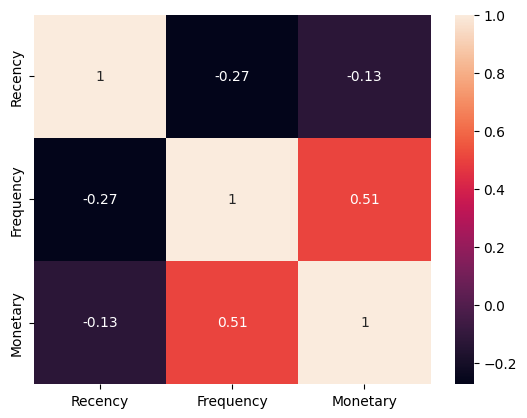

In [102]:
# show correlations with a heatmap
sns.heatmap(df_kmeans.corr(), annot=True);

# As seen, there is no multicolinearity between the features. A week multicolinearity between the features
# make clustering harder since it becomes more difficult to find patterns based on the relationships of the
# features in the dataset. We will check this in detail with a pairplot below

### ii. Visualize Feature Distributions

To get a better understanding of the dataset, you can costruct a scatter matrix of each of the three features in the RFM data.

**PS: What is a scatter matrix:** The pairplot function creates a scatter matrix by plotting pairwise relationships between the selected features. Each scatter plot shows the relationship between two variables, and the diagonal plots show the distribution of each variable. 

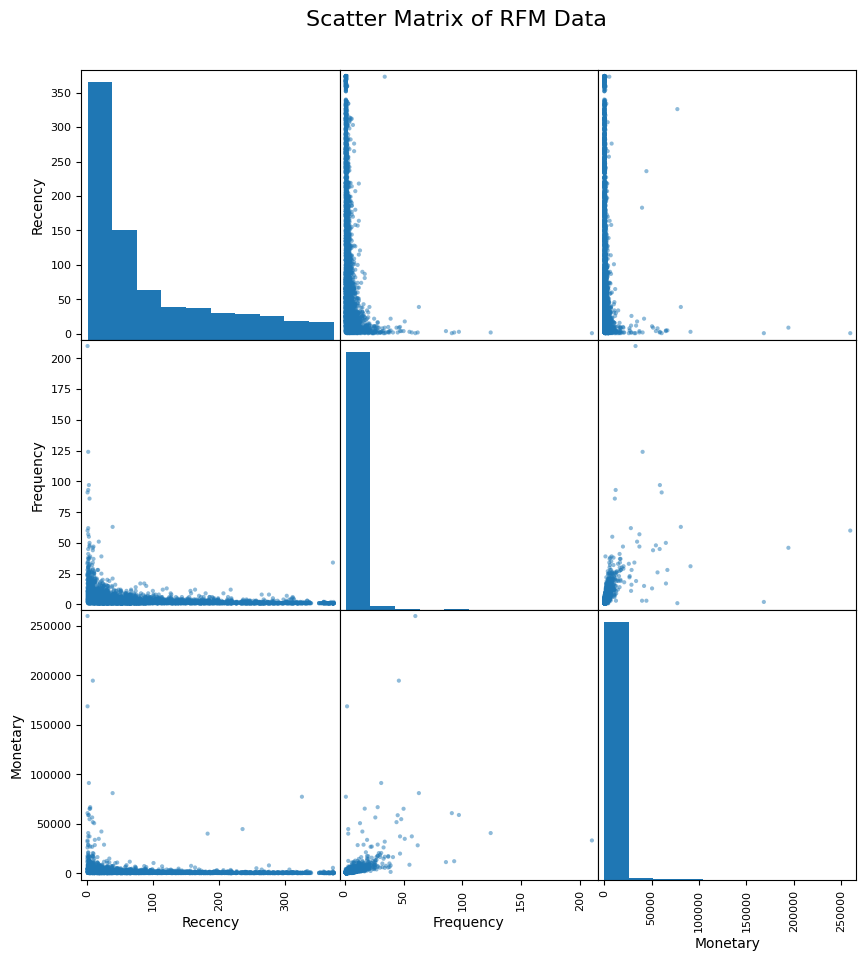

In [103]:
scatter_matrix = pd.plotting.scatter_matrix(df_kmeans, figsize=(10, 10))

plt.suptitle('Scatter Matrix of RFM Data', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()
# It is not clear to check a potential clustering tendency from the scatter plots between the features

### iii. Data Normalization

1. Logarithmic Tranformation can be used to normalize the values in a column.
2. Plot normalized data with scatter matrix or pairplot. Also evaluate results.

In [104]:
# import scalers
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [105]:
def remove_outliers(df, column, q1=0.25, q3=0.75):
    # Q1 ve Q3 değerlerini hesapla
    q1_val = df[column].quantile(q1)
    q3_val = df[column].quantile(q3)
    
    # IQR değerini hesapla
    iqr = q3_val - q1_val
    
    # Alt ve üst sınırları belirle
    lower_bound = q1_val - 1.5 * iqr
    upper_bound = q3_val + 1.5 * iqr
    
    # Outlier değerleri çıkar
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_filtered

In [106]:
# define a function to check the hopkins score for each scaler
from sklearn.neighbors import BallTree
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]

In [107]:
# Normalize the distribution of the features by using logarithmic transformation

df_log = np.log(df_kmeans[['Recency', 'Frequency', 'Monetary']])
display(df_log.head(), df_log.describe())

Recency  Frequency   Monetary
CustomerID                                
12346       5.786897   0.000000  11.253942
12747       1.098612   2.397895   8.341889
12748       0.000000   5.347108  10.405873
12749       1.386294   1.609438   8.316515
12820       1.386294   1.386294   6.848366

Recency    Frequency     Monetary
count  3920.000000  3920.000000  3920.000000
mean      3.798750     0.945557     6.537687
std       1.382343     0.900419     1.247878
min       0.000000     0.000000     1.321756
25%       2.890372     0.000000     5.697714
50%       3.931826     0.693147     6.469211
75%       4.962845     1.609438     7.359649
max       5.924256     5.347108    12.467118

In [108]:
df_outlier = remove_outliers(df_kmeans, 'Recency')
df_outlier = remove_outliers(df_kmeans, 'Frequency')
df_outlier = remove_outliers(df_kmeans, 'Monetary')

In [109]:
df_log.reset_index(drop=True, inplace=True)
df_outlier.reset_index(drop=True, inplace=True)

In [110]:
display(df_outlier.head(), df_outlier.describe())

Recency  Frequency  Monetary
0        4          4    942.34
1      215          1     92.72
2       71          2    948.88
3       75          5   1759.50
4       60          1    397.12

Recency    Frequency     Monetary
count  3539.000000  3539.000000  3539.000000
mean    100.020062     2.897146   840.303381
std     100.993468     2.536481   779.048681
min       1.000000     1.000000     3.750000
25%      23.000000     1.000000   268.835000
50%      59.000000     2.000000   558.320000
75%     159.000000     4.000000  1169.945000
max     374.000000    39.000000  3479.910000

In [111]:
# hopkins test to check if the data is suitable for clustering. a score < 0.5 means higher tendency
df1 = df_log.copy()
df2 = df_log.copy()
scale_minmax = hopkins(MinMaxScaler().fit_transform(df1), df1.shape[0])
scale_stand = hopkins(StandardScaler().fit_transform(df2), df2.shape[0])
print(f"MinMaxScaler() Hopkins: {scale_minmax}\nStandartScaler() Hopkins: {scale_stand}"+"\n\n")

df1 = df_outlier.copy()
df2 = df_outlier.copy()
scale_minmax = hopkins(MinMaxScaler().fit_transform(df1), df1.shape[0])
scale_stand = hopkins(StandardScaler().fit_transform(df2), df2.shape[0])
print(f"MinMaxScaler() Hopkins: {scale_minmax}\nStandartScaler() Hopkins: {scale_stand}")
# Both give very similar results, we will continue with standard scaler

MinMaxScaler() Hopkins: 0.06091987267974685
StandartScaler() Hopkins: 0.05920717053405866


MinMaxScaler() Hopkins: 0.04137713729947949
StandartScaler() Hopkins: 0.030090996167163167


Text(0.5, 1.02, 'Without Outliers Data')

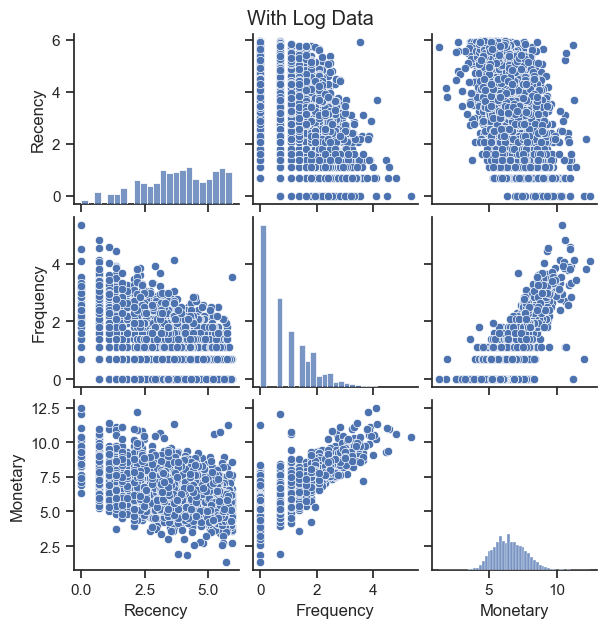

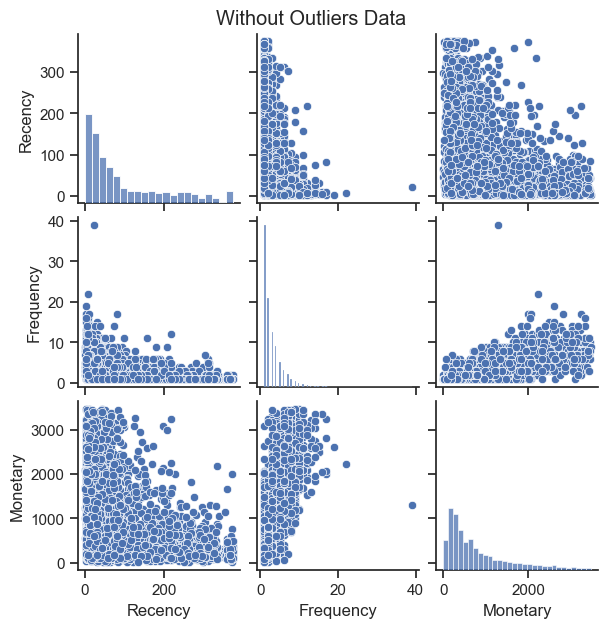

In [112]:
# İlk pairplot
sns.set(style="ticks")
pairplot1 = sns.pairplot(df_log)
pairplot1.fig.set_size_inches(6, 6)
pairplot1.fig.suptitle('With Log Data', y=1.02)
# İkinci pairplot
sns.set(style="ticks")
pairplot2 = sns.pairplot(df_outlier)
pairplot2.fig.set_size_inches(6, 6)
pairplot2.fig.suptitle('Without Outliers Data', y=1.02)

## K-Means Implementation

For k-means, you have to set k to the number of clusters you want, but figuring out how many clusters is not obvious from the beginning. We will try different cluster numbers and check their [silhouette coefficient](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html). The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). 
<br>
<br>
**Note**: K-means is sensitive to initializations because they are critical to qualifty of optima found. Thus, we will use smart initialization called "Elbow Method".

In [113]:
X_log = df_log.copy()
X_outlier = df_outlier.copy()

In [114]:
scaler = StandardScaler()
Xs_log = scaler.fit_transform(X_log)
Xs_outlier = scaler.fit_transform(X_outlier)

### i. Define the Optimal Number of Clusters

[The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering) 

In [115]:
from sklearn.cluster import KMeans

ssd1 = []
ssd2 = []

K = range(2,10)

for k in K:
    model1 = KMeans(n_clusters =k, 
                   random_state=42)
    model2 = KMeans(n_clusters =k, 
                   random_state=42)
    model1.fit(Xs_log)
    model2.fit(Xs_outlier)
    ssd1.append(model1.inertia_)
    ssd2.append(model2.inertia_)

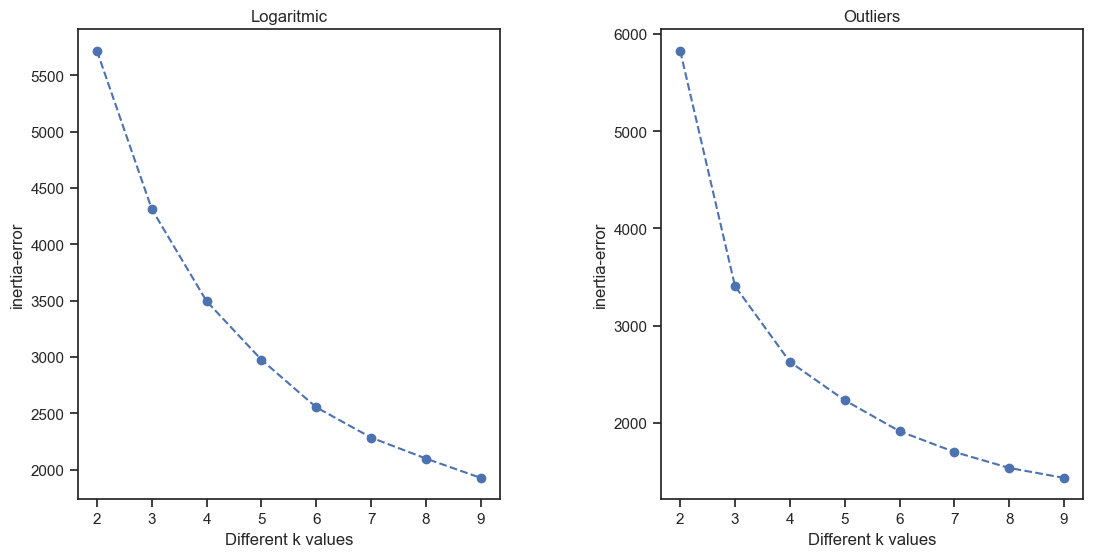

In [116]:
# check the first sharp decrease

plt.subplot(1, 2, 1)  
plt.plot(K, ssd1, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Logaritmic")

plt.subplot(1, 2, 2)  
plt.plot(K, ssd2, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Outliers")

plt.tight_layout()  

fig = plt.gcf()
fig.set_size_inches(12, 6) 

plt.show()

# optimal number of clusters looks as 4 or 5

In [117]:
# check the inertia scores
df_diff1 =pd.DataFrame(-pd.Series(ssd1).diff()).rename(index = lambda x : x+1)
df_diff2 =pd.DataFrame(-pd.Series(ssd2).diff()).rename(index = lambda x : x+1)

<Axes: >

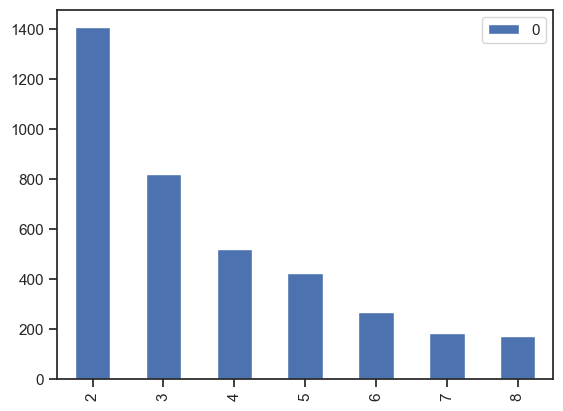

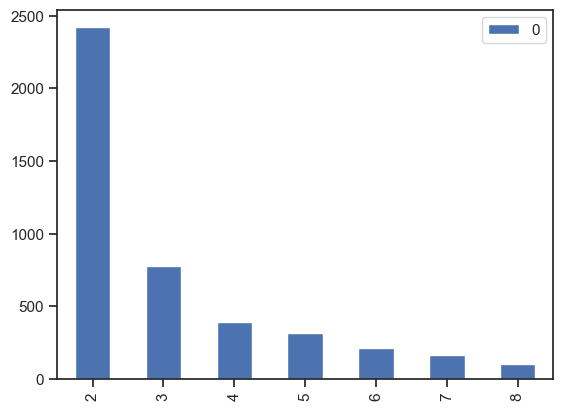

In [118]:
df_diff1[1:].plot(kind='bar')
df_diff2[1:].plot(kind='bar')
# sharp decrease stops in 4th cluster. We'll check it also with silhoutte analysis

[Silhouette Coefficient](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [119]:
from sklearn.metrics import silhouette_score

In [120]:
# fit the model with 5 clusters to get the labels
model_log = KMeans(n_clusters=4, random_state=101)
model_log.fit(Xs_log)
silhouette_score(Xs_log, model_log.labels_)

0.33382031930386696

In [121]:
model_out = KMeans(n_clusters=4, random_state=101)
model_out.fit(Xs_outlier)
silhouette_score(Xs_outlier, model_out.labels_)

0.4313799061441734

In [122]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, 
                    random_state=42)
    kmeans.fit(Xs_log)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(Xs_log, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")
      

For n_clusters=2, the silhouette score is 0.4340201101220068
For n_clusters=3, the silhouette score is 0.34076196797335456
For n_clusters=4, the silhouette score is 0.33529096650214374
For n_clusters=5, the silhouette score is 0.3100669939810707
For n_clusters=6, the silhouette score is 0.3138489041311445
For n_clusters=7, the silhouette score is 0.312321903567091
For n_clusters=8, the silhouette score is 0.2817281422688688


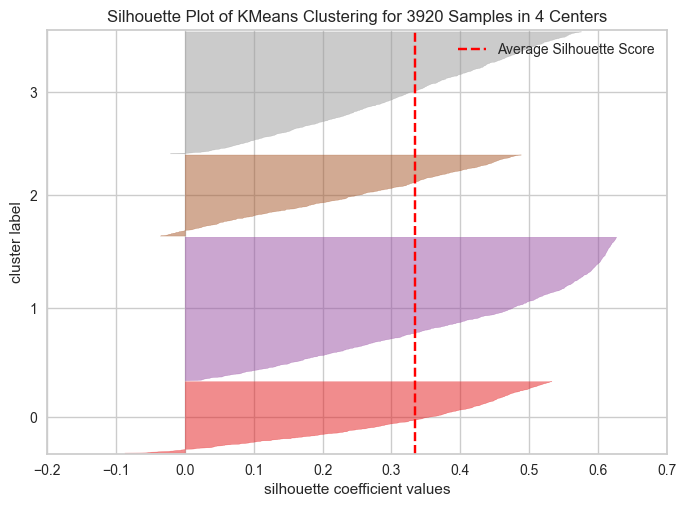

In [123]:
from yellowbrick.cluster import SilhouetteVisualizer
        
visualizer = SilhouetteVisualizer(model_log)

visualizer.fit(Xs_log)    
visualizer.poof();

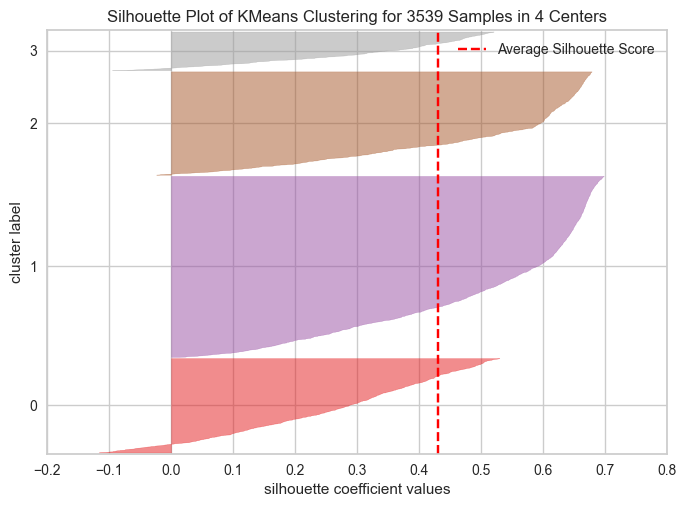

In [124]:
visualizer = SilhouetteVisualizer(model_out)

visualizer.fit(Xs_outlier)    # Fit the data to the visualizer
visualizer.poof();

**Result: How many clusters?**

Based on these silhouette scores, the highest score is achieved for n_clusters=2, with a silhouette score of 0.4212. However, it's important to note that the silhouette score alone may not be sufficient to make a definitive decision on the optimal number of clusters. A higher silhoutte score for 2 clusters means a veyr high inertia score which means that the clusters will distribute to a very wide area and we will not be able to have the minimum intra cluster condition. 

Therefore, we should also consider other factors such as the domain knowledge, the interpretability of the clusters, and the specific context of our analysis. It's recommended to explore the data further and assess the quality and meaningfulness of the resulting clusters before finalizing the number of clusters.

All in all, by taking the elbow method and silhoutte scores together into account we will continue with 4 clusters (It can still be changed after discussing the issue with the client).

PS: We have also built the model with 5 or 6 clusters such as the optimal number of clusters we chose during RFM analysis but neither maximum intercluster distance nor minimum intracluster consitions could be obtained in these cases. Therefore we have chosen a model with 4 clusters which performs still poorly but better than the model with 6 clusters.

### ii. Model Fitting

Fit the K-Means Algorithm with the optimal number of clusters you decided and save the model to disk.

In [125]:
# define the clusters
clusters1 = model_log.labels_
clusters2 = model_out.labels_

In [126]:
# add predicted clusters as a new feature to the data (the version without log transformation)
df_log["clusters_log"] = clusters1
df_outlier["clusters_out"] = clusters2
display(df_log)
display(df_outlier)

# the data has labels now

Recency  Frequency   Monetary  clusters_log
0     5.786897   0.000000  11.253942             3
1     1.098612   2.397895   8.341889             0
2     0.000000   5.347108  10.405873             0
3     1.386294   1.609438   8.316515             0
4     1.386294   1.386294   6.848366             0
...        ...        ...        ...           ...
3915  5.627621   0.000000   5.196285             1
3916  5.198497   0.000000   4.392224             1
3917  2.079442   0.693147   5.182064             2
3918  1.386294   2.772589   7.623412             0
3919  3.761200   1.098612   7.516041             3

[3920 rows x 4 columns]

Recency  Frequency  Monetary  clusters_out
0           4          4    942.34             0
1         215          1     92.72             2
2          71          2    948.88             1
3          75          5   1759.50             0
4          60          1    397.12             1
...       ...        ...       ...           ...
3534      278          1    180.60             2
3535      181          1     80.82             2
3536        8          2    178.05             1
3537        4         16   2045.53             3
3538       43          3   1837.28             0

[3539 rows x 4 columns]

### iii. Visualize the Clusters

1. Create a scatter plot and select cluster centers

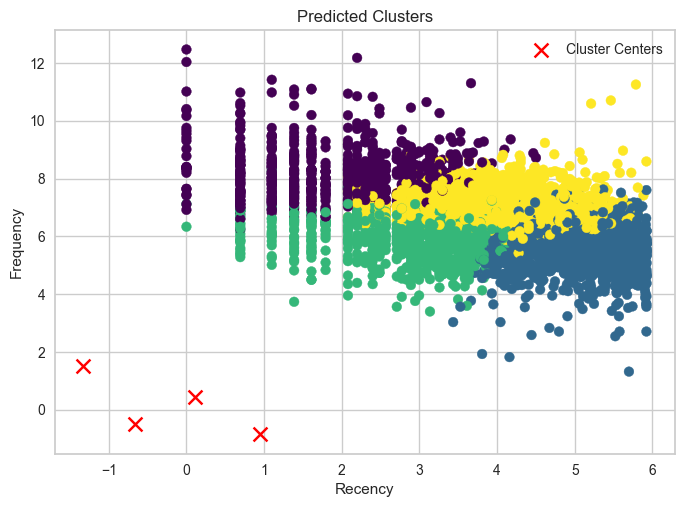

In [127]:
# Create a scatter plot
plt.scatter(df_log['Recency'], df_log['Monetary'], c=df_log['clusters_log'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Predicted Clusters')

# Select cluster centers
cluster_centers = model_log.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', s=100, label='Cluster Centers')

plt.legend()
plt.show()

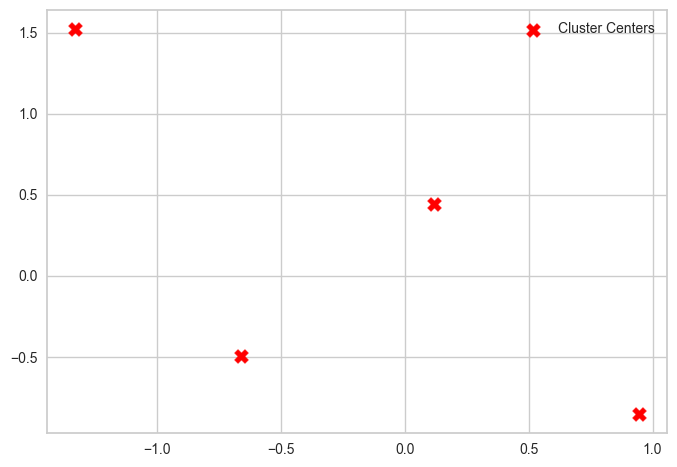

In [128]:
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=100, label='Cluster Centers')
plt.legend()
plt.show()

In [129]:
df_log

Recency  Frequency   Monetary  clusters_log
0     5.786897   0.000000  11.253942             3
1     1.098612   2.397895   8.341889             0
2     0.000000   5.347108  10.405873             0
3     1.386294   1.609438   8.316515             0
4     1.386294   1.386294   6.848366             0
...        ...        ...        ...           ...
3915  5.627621   0.000000   5.196285             1
3916  5.198497   0.000000   4.392224             1
3917  2.079442   0.693147   5.182064             2
3918  1.386294   2.772589   7.623412             0
3919  3.761200   1.098612   7.516041             3

[3920 rows x 4 columns]

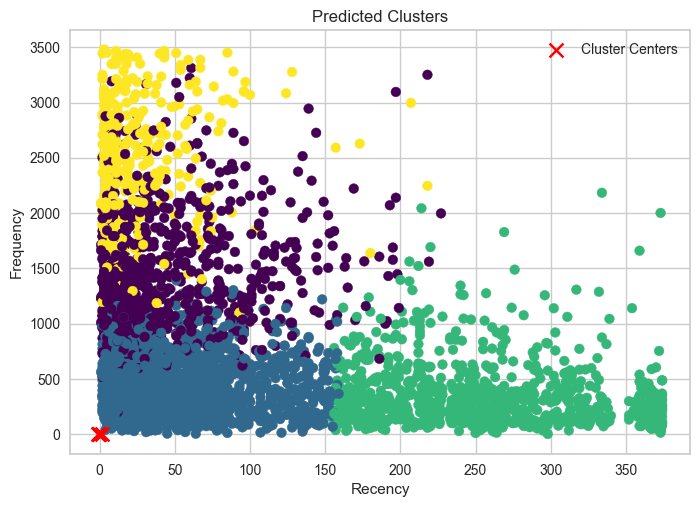

In [130]:
plt.scatter(df_outlier['Recency'], df_outlier['Monetary'], c=df_outlier['clusters_out'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Predicted Clusters')

# Select cluster centers
cluster_centers = model_out.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', s=100, label='Cluster Centers')

plt.legend()
plt.show()

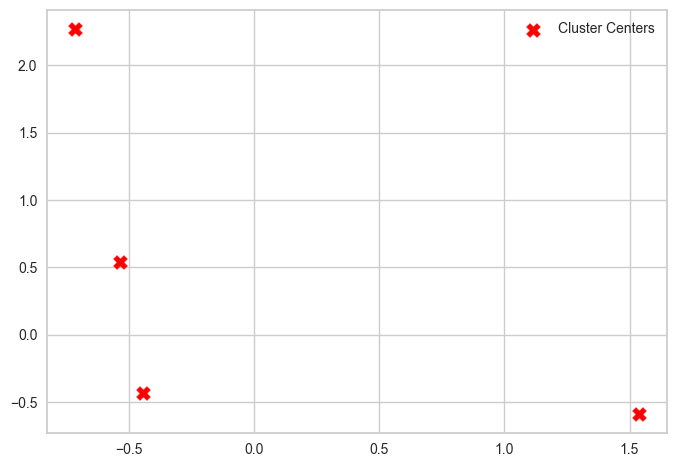

In [131]:
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=100, label='Cluster Centers')
plt.legend()
plt.show()

2. Visualize Cluster Id vs Recency, Cluster Id vs Frequency and Cluster Id vs Monetary using Box plot. Also evaluate the results. 

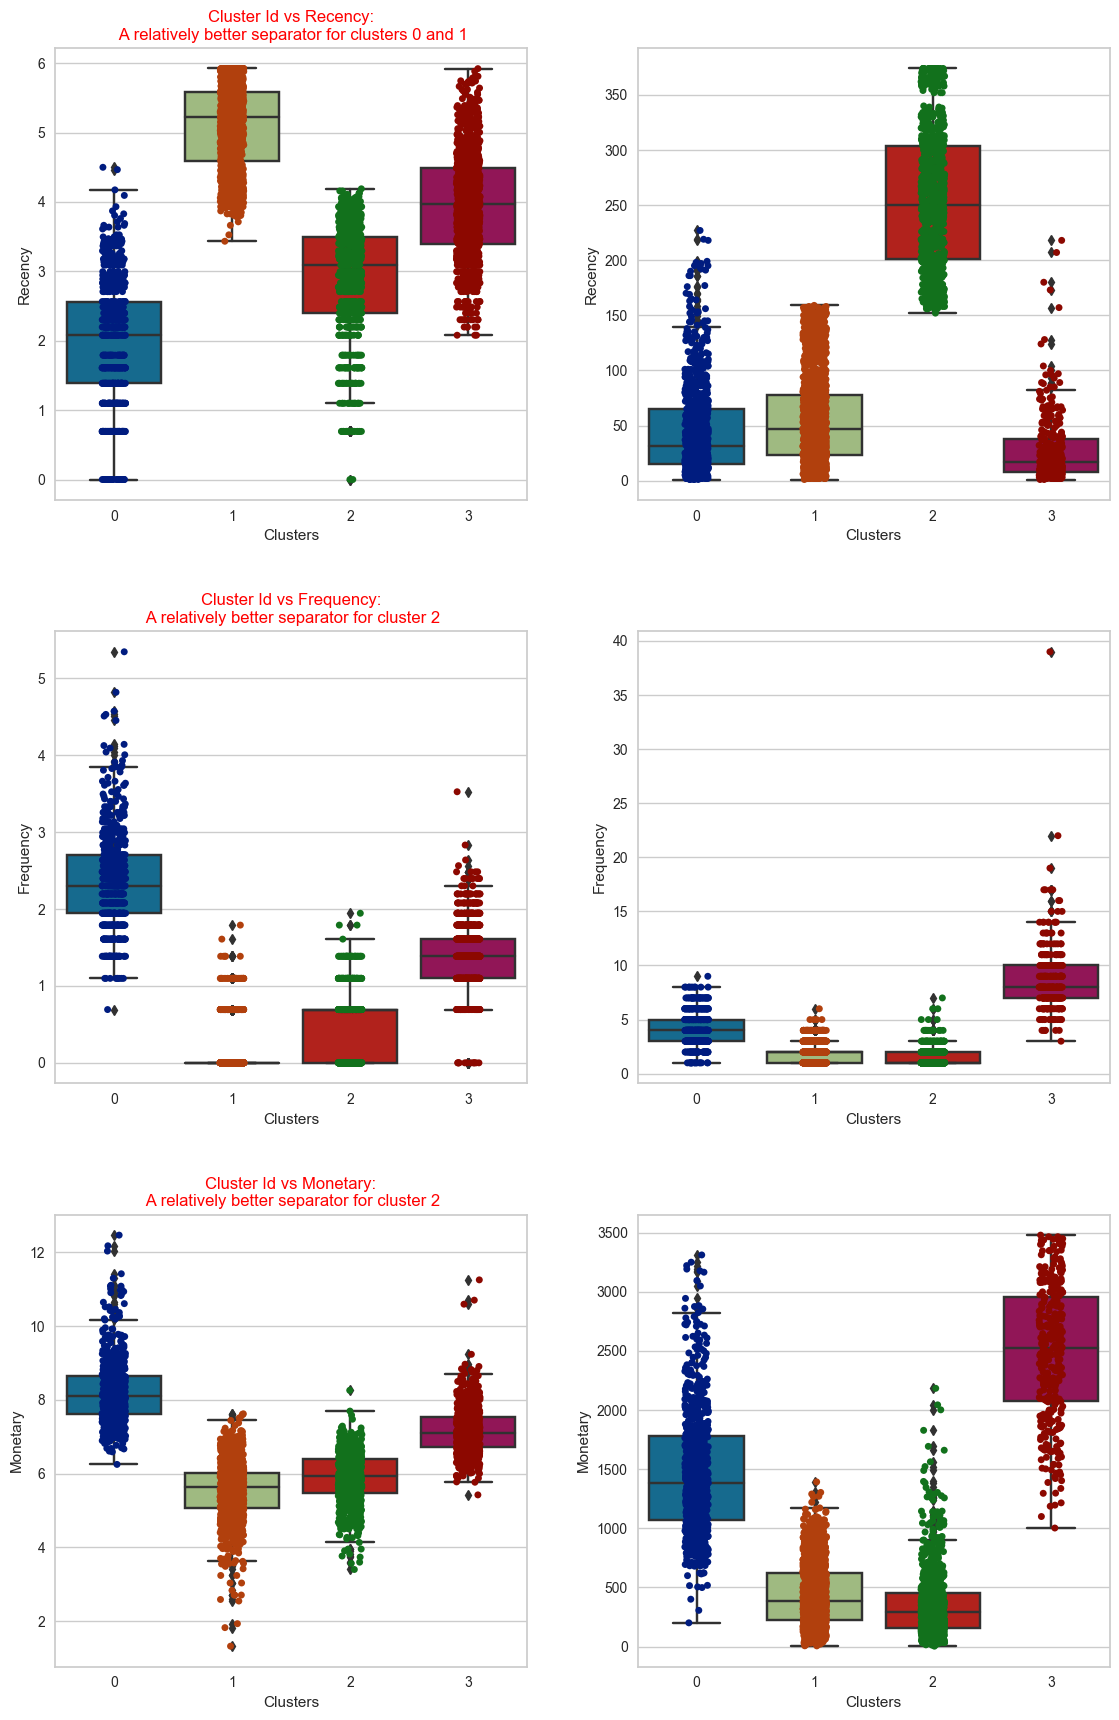

In [132]:
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

# Plot for df_log
sns.boxplot(y="Recency", x="clusters_log", data=df_log, ax=axes[0, 0])
sns.stripplot(y="Recency", x="clusters_log", data=df_log, palette="dark", ax=axes[0, 0])
axes[0, 0].set_xlabel('Clusters')
axes[0, 0].set_ylabel('Recency')
axes[0, 0].set_title('Cluster Id vs Recency:\n A relatively better separator for clusters 0 and 1', fontdict={"color":"red"})

sns.boxplot(y="Frequency", x="clusters_log", data=df_log, ax=axes[1, 0])
sns.stripplot(y="Frequency", x="clusters_log", data=df_log, palette="dark", ax=axes[1, 0])
axes[1, 0].set_xlabel('Clusters')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Cluster Id vs Frequency:\n A relatively better separator for cluster 2', fontdict={"color":"red"})

sns.boxplot(y="Monetary", x="clusters_log", data=df_log, ax=axes[2, 0])
sns.stripplot(y="Monetary", x="clusters_log", data=df_log, palette="dark", ax=axes[2, 0])
axes[2, 0].set_xlabel('Clusters')
axes[2, 0].set_ylabel('Monetary')
axes[2, 0].set_title('Cluster Id vs Monetary:\n A relatively better separator for cluster 0', fontdict={"color":"red"})

# Plot for df_outlier
sns.boxplot(y="Recency", x="clusters_out", data=df_outlier, ax=axes[0, 1])
sns.stripplot(y="Recency", x="clusters_out", data=df_outlier, palette="dark", ax=axes[0, 1])
axes[0, 1].set_xlabel('Clusters')
axes[0, 1].set_ylabel('Recency')

sns.boxplot(y="Frequency", x="clusters_out", data=df_outlier, ax=axes[1, 1])
sns.stripplot(y="Frequency", x="clusters_out", data=df_outlier, palette="dark", ax=axes[1, 1])
axes[1, 1].set_xlabel('Clusters')
axes[1, 1].set_ylabel('Frequency')

sns.boxplot(y="Monetary", x="clusters_out", data=df_outlier, ax=axes[2, 1])
sns.stripplot(y="Monetary", x="clusters_out", data=df_outlier, palette="dark", ax=axes[2, 1])
axes[2, 1].set_xlabel('Clusters')
axes[2, 1].set_ylabel('Monetary')

fig.tight_layout(pad=3.0) 

plt.show()

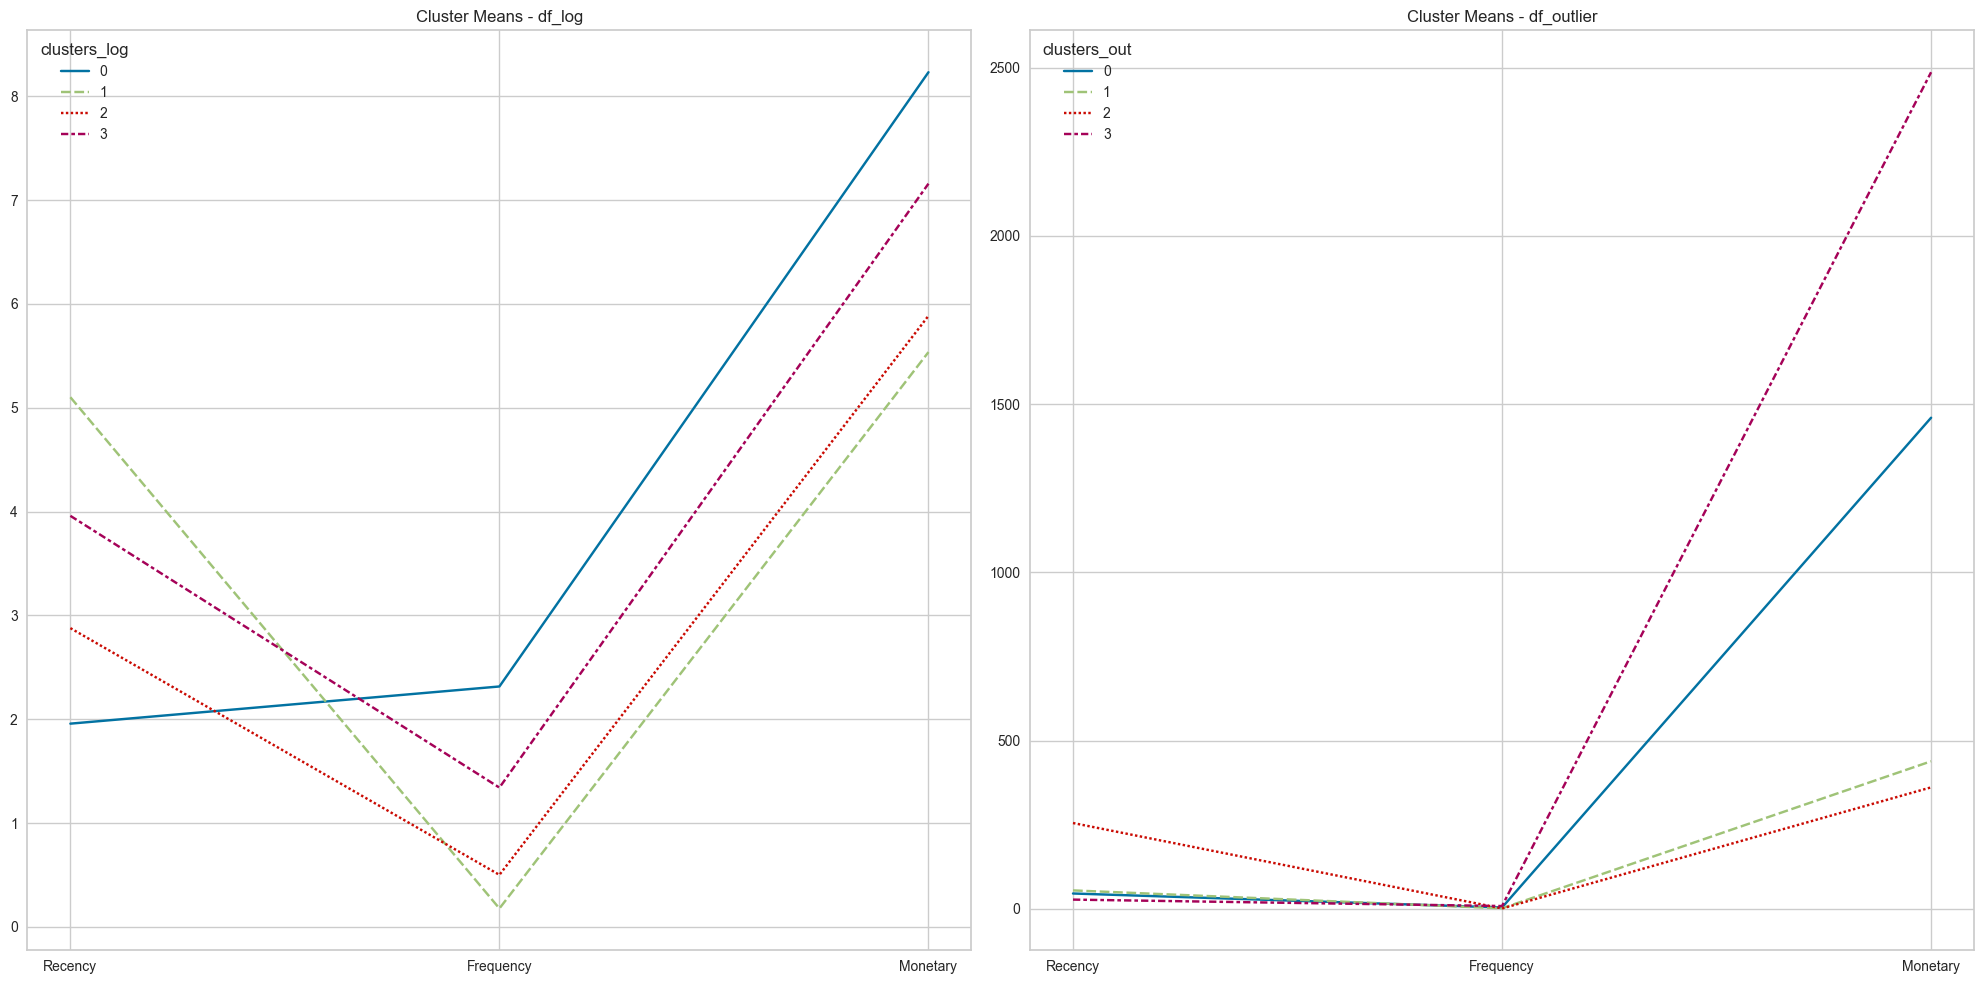

In [133]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Line plot for df_log
clus_pred_log = df_log.groupby('clusters_log').mean()
sns.lineplot(data=clus_pred_log.T, ax=axes[0])
axes[0].set_title('Cluster Means - df_log')

# Line plot for df_outlier
clus_pred_outlier = df_outlier.groupby('clusters_out').mean()
sns.lineplot(data=clus_pred_outlier.T, ax=axes[1])
axes[1].set_title('Cluster Means - df_outlier')

plt.tight_layout()
plt.show()

<Figure size 2000x1000 with 0 Axes>

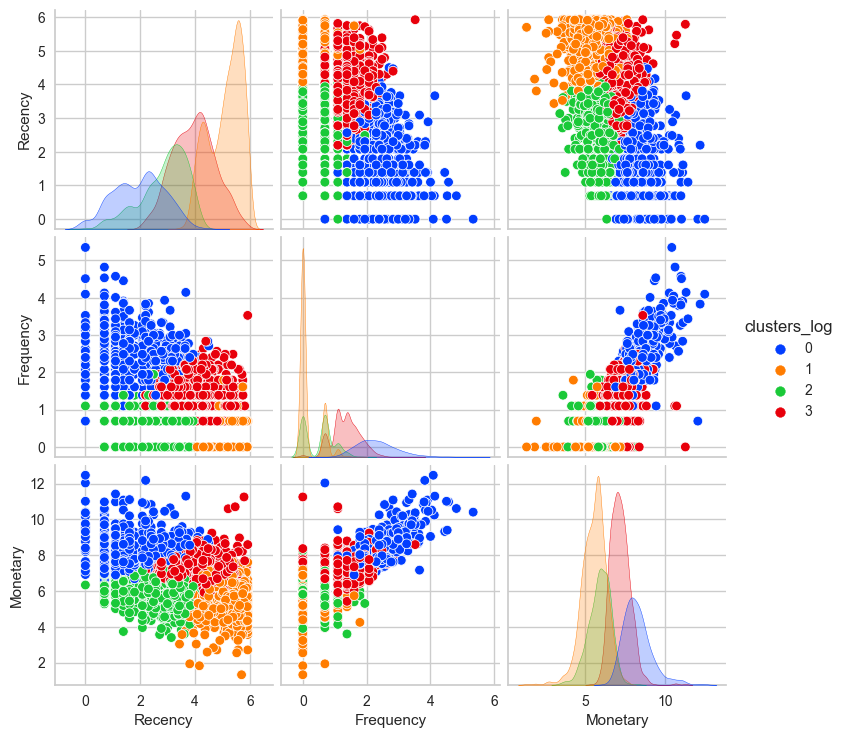

<Figure size 2000x1000 with 0 Axes>

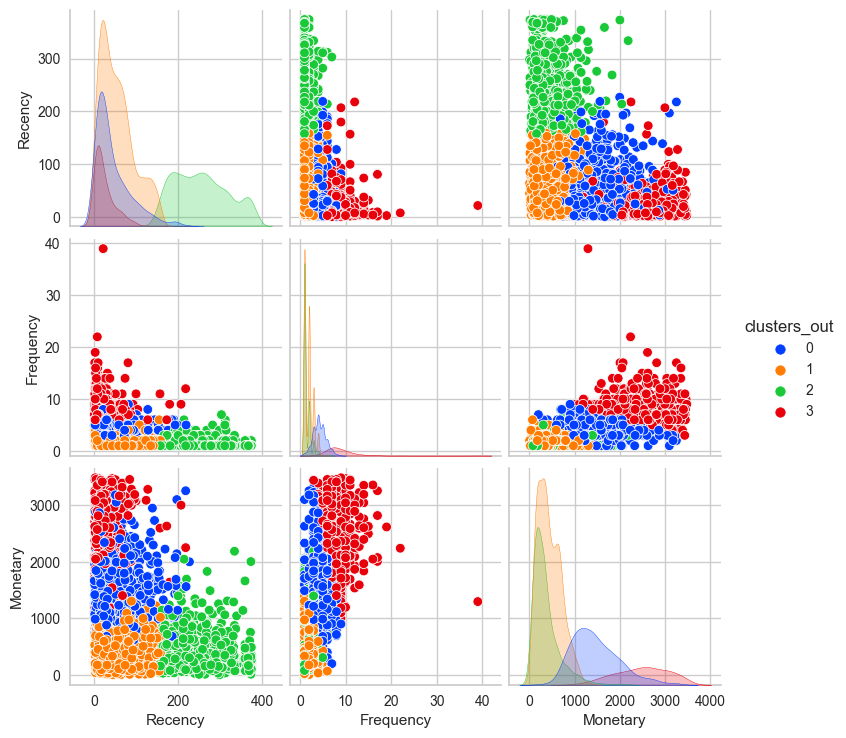

In [134]:
plt.figure(figsize=(20,10))
sns.pairplot(df_log, hue="clusters_log", palette="bright");

plt.figure(figsize=(20,10))
sns.pairplot(df_outlier, hue="clusters_out", palette="bright");

### iv. Assign the Label

In [135]:
clusters = df_log.clusters_log

In [136]:
df_kmeans.reset_index(inplace=True)
df_kmeans['predicted_clusters'] = clusters
df_kmeans.index = df_kmeans.CustomerID
df_kmeans.drop('CustomerID', axis=1, inplace=True)

In [137]:
df_kmeans

Recency  Frequency  Monetary  predicted_clusters
CustomerID                                                  
12346           326          1  77183.60                   3
12747             3         11   4196.01                   0
12748             1        210  33053.19                   0
12749             4          5   4090.88                   0
12820             4          4    942.34                   0
...             ...        ...       ...                 ...
18280           278          1    180.60                   1
18281           181          1     80.82                   1
18282             8          2    178.05                   2
18283             4         16   2045.53                   0
18287            43          3   1837.28                   3

[3920 rows x 4 columns]

In [138]:
df_kmeans.groupby("predicted_clusters").mean()

Recency  Frequency     Monetary
predicted_clusters                                    
0                    10.576119  13.001493  6895.011269
1                   192.128625   1.275093   327.667421
2                    23.391590   1.831800   443.232799
3                    70.147727   4.220280  1649.785186

**What kind of strategies can be implemented for these customer groups:**

**Cluster 0: "High-Value Customers"**

- Offer personalized promotions and discounts to reward their loyalty and encourage repeat purchases.
- Provide exclusive access to new products or services to maintain their interest and engagement.
- Implement a customer referral program to encourage them to refer their friends and family.

**Cluster 1: "Low-Value Inactive Customers"**

- Implement win-back campaigns to re-engage these customers and encourage them to make new purchases.
- Send targeted offers and incentives to reactivate their interest and bring them back to the company.
- Conduct customer surveys or feedback sessions to understand their reasons for inactivity and address any concerns.

**Cluster 2: "Low-Value Customers"**

- Implement targeted marketing campaigns to increase their engagement and encourage more frequent purchases.
- Offer incentives such as discounts or free shipping to motivate them to make additional purchases.
- Provide product recommendations based on their previous purchases to increase their average order value.

**Cluster 4: "Medium-Value Regular Customers"**

- Focus on customer retention by providing excellent customer service and personalized communication.
- Offer loyalty programs or rewards to encourage them to continue their regular purchases.
- Provide upselling and cross-selling opportunities to increase their average order value.


In [139]:
df_kmeans['customer_category'] = df_kmeans['predicted_clusters'].apply(lambda x: 'High-Value Customers' if x==0 
                                                                       else ('Low-Value Inactive Customers' if x==1 
                                                                             else ('Low-Value Customers' if x==2
                                                                                  else "Medium-Value Regular Customers")))
df_kmeans.sample(5)

Recency  Frequency  Monetary  predicted_clusters  \
CustomerID                                                     
14603           275          1    660.00                   1   
13280           123          3    798.46                   3   
17643           374          1    101.55                   1   
17252           117          2    348.91                   1   
15007           160          1    156.91                   1   

                         customer_category  
CustomerID                                  
14603         Low-Value Inactive Customers  
13280       Medium-Value Regular Customers  
17643         Low-Value Inactive Customers  
17252         Low-Value Inactive Customers  
15007         Low-Value Inactive Customers

### v. Conclusion

Discuss your final results. Compare your own labels from the RFM Customer Segmentation with the labels found by K-Means.

How we want to continue this analysis depends on how the business plans to use the results and the level of granularity the business stakeholders want to see in the clusters. We can also ask what range of customer behavior from high to low value customers are the stakeholders interested in exploring. From those answers, various methods of clustering can be used and applied on RFM variable or directly on the transaction data set.

**Annotation:**

Limitations of K-means clustering:

1. There is no assurance that it will lead to the global best solution.
2. Can't deal with different shapes(not circular) and consider one point's probability of belonging to more than one cluster.

These disadvantages of K-means show that for many datasets (especially low-dimensional datasets), it may not perform as well as you might hope.

**Conclusion**

* Write down your conclusions about clustering 

Both clustering tendency and clustering quality were not high enough for this data to implement k-means clustering algorithm. Neither inter cluster max distance, nor intra l-cluster minimum distance conditions could be actualized. As a result, the data and main characteristics of the defined cluster should be discussed with the client in detail and the customer categories should be clarified according to the specific demands of the client.


# 5. Create Cohort & Conduct Cohort Analysis
[Cohort Analysis](https://medium.com/swlh/cohort-analysis-using-python-and-pandas-d2a60f4d0a4d) is specifically useful in analyzing user growth patterns for products. In terms of a product, a cohort can be a group of people with the same sign-up date, the same usage starts month/date, or the same traffic source.
Cohort analysis is an analytics method by which these groups can be tracked over time for finding key insights. This analysis can further be used to do customer segmentation and track metrics like retention, churn, and lifetime value.

For e-commerce organizations, cohort analysis is a unique opportunity to find out which clients are the most valuable to their business. by performing Cohort analysis you can get the following answers to the following questions:

- How much effective was a marketing campaign held in a particular time period?
- Did the strategy employ to improve the conversion rates of Customers worked?
- Should I focus more on retention rather than acquiring new customers?
- Are my customer nurturing strategies effective?
- Which marketing channels bring me the best results?
- Is there a seasonality pattern in Customer behavior?
- Along with various performance measures/metrics for your organization.

Since we will be performing Cohort Analysis based on transaction records of customers, the columns we will be dealing with mainly:
- Invoice Data
- CustomerID
- Price
- Quantity

The following steps will performed to generate the Cohort Chart of Retention Rate:
- Month Extraction from InvioceDate column
- Assigning Cohort to Each Transaction
- Assigning Cohort Index to each transaction
- Calculating number of unique customers in each Group of (ChortDate,Index)
- Creating Cohort Table for Retention Rate
- Creating the Cohort Chart using the Cohort Table

The Detailed information about each step is given below:

## Feature Engineering

### i. Extract the Month of the Purchase
First we will create a function, which takes any date and returns the formatted date with day value as 1st of the same month and Year.

In [140]:
df_uk.head()

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  total_price  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom        15.30   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom        20.34   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom        22.00   
3 2010-12-01 08:26:00       3.39       17850  United Kingdom        20.34   
4 2010-12-01 08:26:00       3.39       17850  United Kingdom        20.34   

         Date  
0  2010-12-01  
1  2010-12-01  
2  2010-12-01  
3  2010-12-01  
4  2010-12-01

In [141]:
df_cohort = df_uk.copy()

In [142]:
df_cohort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349227 entries, 0 to 541893
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    349227 non-null  int32         
 1   StockCode    349227 non-null  object        
 2   Description  349227 non-null  object        
 3   Quantity     349227 non-null  int64         
 4   InvoiceDate  349227 non-null  datetime64[ns]
 5   UnitPrice    349227 non-null  float64       
 6   CustomerID   349227 non-null  int32         
 7   Country      349227 non-null  object        
 8   total_price  349227 non-null  float64       
 9   Date         349227 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(4)
memory usage: 26.6+ MB


In [143]:
# extract the date part of the InvoiceDate feature
df_cohort.InvoiceDate = pd.to_datetime(df_cohort.InvoiceDate).dt.date

In [144]:
# define a function to edit the day of the invoice date as the 1st day of the related month

def month_1st(Date):
    # Convert the input date to a datetime object
    date_obj = pd.to_datetime(Date)

    # Extract the year and month from the input date
    year = date_obj.year
    month = date_obj.month

    # Create a new datetime object with the day set as 1st of the same month and year
    formatted_date = pd.to_datetime(f"{year}-{month}-01")

    return formatted_date


Now we will use the function created above to convert all the invoice dates into respective month date format.

In [145]:
# extract the month as a new feature and set the day of the month as 1
df_cohort['InvoiceMonth'] = df_cohort['InvoiceDate'].apply(month_1st)
df_cohort.head(3)

InvoiceNo StockCode                         Description  Quantity  \
0     536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                 WHITE METAL LANTERN         6   
2     536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

  InvoiceDate  UnitPrice  CustomerID         Country  total_price        Date  \
0  2010-12-01       2.55       17850  United Kingdom        15.30  2010-12-01   
1  2010-12-01       3.39       17850  United Kingdom        20.34  2010-12-01   
2  2010-12-01       2.75       17850  United Kingdom        22.00  2010-12-01   

  InvoiceMonth  
0   2010-12-01  
1   2010-12-01  
2   2010-12-01

In [146]:
# find the first transaction month for each customer and then create a feature called CohortMonth
df_cohort['CohortMonth'] = df_cohort.groupby('CustomerID')['InvoiceMonth'].transform('min')
df_cohort.sample(5)

InvoiceNo StockCode                     Description  Quantity  \
218286     556039    84510A  SET OF 4 ENGLISH ROSE COASTERS        10   
283057     561688     22846      BREAD BIN DINER STYLE RED          4   
469347     576593     21833            CAMOUFLAGE LED TORCH         3   
117011     546321     22464     HANGING METAL HEART LANTERN        12   
422046     573038     23553     LANDMARK FRAME CAMDEN TOWN          1   

       InvoiceDate  UnitPrice  CustomerID         Country  total_price  \
218286  2011-06-08       1.25       13001  United Kingdom        12.50   
283057  2011-07-29      14.95       14407  United Kingdom        59.80   
469347  2011-11-15       1.69       15720  United Kingdom         5.07   
117011  2011-03-11       1.65       16475  United Kingdom        19.80   
422046  2011-10-27      12.50       17545  United Kingdom        12.50   

              Date InvoiceMonth CohortMonth  
218286  2011-06-08   2011-06-01  2011-01-01  
283057  2011-07-29   2011-07-01  2011-03-01  
469347  2011-11-15   2011-11-01  2011-11-01  
117011  2011-03-11   2011-03-01  2011-03-01  
422046  2011-10-27   2011-10-01  2011-10-01

### ii. Calculating time offset in Months i.e. Cohort Index:
Calculating time offset for each transaction will allows us to report the metrics for each cohort in a comparable fashion.
First, you will create 4 variables that capture the integer value of years, months for Invoice and Cohort Date using the get_date_int() function which you'll create it below.

In [147]:
def get_date_int (data,feature):
    year = data[feature].dt.year
    month = data[feature].dt.month
    day = data[feature].dt.day
    return year, month, day 

You will use this function to extract the integer values for Invoice as well as Cohort Date in 3 separate series for each of the two columns

In [148]:
invoice_year,invoice_month,_ = get_date_int(df_cohort,'InvoiceMonth')
cohort_year,cohort_month,_ = get_date_int(df_cohort,'CohortMonth')


Use the variables created above to calcualte the difference in days and store them in cohort Index column.

In [149]:
year_diff = invoice_year - cohort_year 
month_diff = invoice_month - cohort_month 

df_cohort['CohortIndex'] = year_diff * 12 + month_diff + 1 

df_cohort.sample(5)


InvoiceNo StockCode                      Description  Quantity  \
45024      540247     22348      TEA BAG PLATE RED RETROSPOT         1   
534336     581146     23502     PLAYING CARDS VINTAGE DOILY          3   
120891     546683     22666  RECIPE BOX PANTRY YELLOW DESIGN         6   
192599     553461     22899     CHILDREN'S APRON DOLLY GIRL          6   
305558     563698    90014C      SILVER/BLACK ORBIT NECKLACE         2   

       InvoiceDate  UnitPrice  CustomerID         Country  total_price  \
45024   2011-01-05       0.85       15464  United Kingdom         0.85   
534336  2011-12-07       1.25       17602  United Kingdom         3.75   
120891  2011-03-16       2.95       12868  United Kingdom        17.70   
192599  2011-05-17       2.10       16316  United Kingdom        12.60   
305558  2011-08-18       9.95       14667  United Kingdom        19.90   

              Date InvoiceMonth CohortMonth  CohortIndex  
45024   2011-01-05   2011-01-01  2011-01-01            1  
534336  2011-12-07   2011-12-01  2011-01-01           12  
120891  2011-03-16   2011-03-01  2010-12-01            4  
192599  2011-05-17   2011-05-01  2010-12-01            6  
305558  2011-08-18   2011-08-01  2010-12-01            9

In [150]:
# check the final data
df_cohort.CohortIndex.value_counts()

1     103680
2      25048
4      24209
3      24097
6      23189
5      23001
7      20761
8      20640
9      20562
12     20467
10     19888
11     17332
13      6353
Name: CohortIndex, dtype: int64

## Create 1st Cohort: User number & Retention Rate

### i. Pivot Cohort and Cohort Retention

In [151]:
# Find the number of customers for each cohort month and each cohort index

cohort_customers = df_cohort.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].apply(pd.Series.nunique)


In [152]:
# Return number of unique elements in the object.

# reset the index
cohort_customers = cohort_customers.reset_index()

# create a cohort pivot from the total number of customers for each cohort index and cohort month
customer_per_cohort = cohort_customers.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')
customer_per_cohort

CohortIndex     1      2      3      4      5      6      7      8      9   \
CohortMonth                                                                  
2010-12-01   815.0  289.0  263.0  304.0  293.0  323.0  291.0  278.0  289.0   
2011-01-01   358.0   76.0   93.0   84.0  119.0   99.0   90.0   87.0  108.0   
2011-02-01   340.0   64.0   66.0   97.0   98.0   86.0   87.0   96.0   90.0   
2011-03-01   419.0   64.0  109.0   83.0   94.0   69.0  111.0   96.0  119.0   
2011-04-01   277.0   58.0   56.0   60.0   56.0   61.0   61.0   73.0   20.0   
2011-05-01   256.0   48.0   44.0   44.0   53.0   58.0   68.0   23.0    NaN   
2011-06-01   214.0   38.0   31.0   51.0   51.0   69.0   21.0    NaN    NaN   
2011-07-01   169.0   30.0   33.0   39.0   47.0   18.0    NaN    NaN    NaN   
2011-08-01   141.0   32.0   32.0   34.0   17.0    NaN    NaN    NaN    NaN   
2011-09-01   276.0   63.0   83.0   32.0    NaN    NaN    NaN    NaN    NaN   
2011-10-01   324.0   79.0   36.0    NaN    NaN    NaN    NaN    NaN    NaN   
2011-11-01   298.0   35.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01    34.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

CohortIndex     10     11     12     13  
CohortMonth                              
2010-12-01   325.0  299.0  405.0  218.0  
2011-01-01   117.0  127.0   43.0    NaN  
2011-02-01   104.0   25.0    NaN    NaN  
2011-03-01    38.0    NaN    NaN    NaN  
2011-04-01     NaN    NaN    NaN    NaN  
2011-05-01     NaN    NaN    NaN    NaN  
2011-06-01     NaN    NaN    NaN    NaN  
2011-07-01     NaN    NaN    NaN    NaN  
2011-08-01     NaN    NaN    NaN    NaN  
2011-09-01     NaN    NaN    NaN    NaN  
2011-10-01     NaN    NaN    NaN    NaN  
2011-11-01     NaN    NaN    NaN    NaN  
2011-12-01     NaN    NaN    NaN    NaN

In [153]:
# calculate retention rates for first cohort index
# Retention table
cohort_size = customer_per_cohort.iloc[:,0] # iloc[:,0] for the cohort index 1 
cohort_size

CohortMonth
2010-12-01    815.0
2011-01-01    358.0
2011-02-01    340.0
2011-03-01    419.0
2011-04-01    277.0
2011-05-01    256.0
2011-06-01    214.0
2011-07-01    169.0
2011-08-01    141.0
2011-09-01    276.0
2011-10-01    324.0
2011-11-01    298.0
2011-12-01     34.0
Name: 1, dtype: float64

In [154]:
retention_rate = customer_per_cohort.divide(cohort_size,axis=0)
retention_rate.round(3) * 100 

CohortIndex     1     2     3     4     5     6     7     8     9     10  \
CohortMonth                                                                
2010-12-01   100.0  35.5  32.3  37.3  36.0  39.6  35.7  34.1  35.5  39.9   
2011-01-01   100.0  21.2  26.0  23.5  33.2  27.7  25.1  24.3  30.2  32.7   
2011-02-01   100.0  18.8  19.4  28.5  28.8  25.3  25.6  28.2  26.5  30.6   
2011-03-01   100.0  15.3  26.0  19.8  22.4  16.5  26.5  22.9  28.4   9.1   
2011-04-01   100.0  20.9  20.2  21.7  20.2  22.0  22.0  26.4   7.2   NaN   
2011-05-01   100.0  18.8  17.2  17.2  20.7  22.7  26.6   9.0   NaN   NaN   
2011-06-01   100.0  17.8  14.5  23.8  23.8  32.2   9.8   NaN   NaN   NaN   
2011-07-01   100.0  17.8  19.5  23.1  27.8  10.7   NaN   NaN   NaN   NaN   
2011-08-01   100.0  22.7  22.7  24.1  12.1   NaN   NaN   NaN   NaN   NaN   
2011-09-01   100.0  22.8  30.1  11.6   NaN   NaN   NaN   NaN   NaN   NaN   
2011-10-01   100.0  24.4  11.1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2011-11-01   100.0  11.7   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2011-12-01   100.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

CohortIndex    11    12    13  
CohortMonth                    
2010-12-01   36.7  49.7  26.7  
2011-01-01   35.5  12.0   NaN  
2011-02-01    7.4   NaN   NaN  
2011-03-01    NaN   NaN   NaN  
2011-04-01    NaN   NaN   NaN  
2011-05-01    NaN   NaN   NaN  
2011-06-01    NaN   NaN   NaN  
2011-07-01    NaN   NaN   NaN  
2011-08-01    NaN   NaN   NaN  
2011-09-01    NaN   NaN   NaN  
2011-10-01    NaN   NaN   NaN  
2011-11-01    NaN   NaN   NaN  
2011-12-01    NaN   NaN   NaN

**Explanation of the code above**


customer_per_cohort is a DataFrame that contains the number of customers for each cohort. The rows represent different cohorts, and the columns represent different cohort indices.

cohort_size is a Series that contains the size of each cohort. The index represents the cohort, and the values represent the size of the cohort.

divide(cohort_size, axis=0) is a method of DataFrame that performs element-wise division between customer_per_cohort and cohort_size along axis 0 (rows).

The result of the division operation is a new DataFrame called retention, where each value represents the retention rate for a specific cohort and cohort index. The retention rate is calculated by dividing the number of customers for each cohort by the size of the cohort.

By dividing customer_per_cohort by cohort_size, the code computes the retention rate matrix. Each value in the resulting DataFrame represents the proportion of customers from a specific cohort that continued to make purchases in subsequent periods (cohorts). It provides insights into customer loyalty and retention patterns over time.

**How to assess retention rate table:**

The table represents the retention rates for different cohorts over time.

The rows of the table represent different cohorts, identified by the CohortMonth. Each row corresponds to customers who made their first purchase in that particular month.

The columns of the table represent different cohort indices, identified by the CohortIndex. Each column represents a specific time period after the cohort's initial month.

The values in the table represent the retention rates, expressed as percentages. Each value indicates the proportion of customers from a specific cohort that continued to make purchases in subsequent periods (cohorts).

**For example, let's take the value in the intersection of CohortMonth "2010-12-01" and CohortIndex 3. The retention rate is 32.3%, which means that 32.3% of customers from the cohort that made their first purchase in December 2010 continued to make purchases in the third cohort period (three months after their initial purchase).**

Higher retention rates indicate a higher proportion of customers retained over time, while lower retention rates suggest a drop-off in customer engagement.

### ii. Visualize analysis of cohort 1 using seaborn and matplotlib modules

**Heat map to visualize the retention rate in a cohort analysis**

The most commonly used plot to visualize retention rates in cohort analysis is the heatmap or color map. A heatmap provides a clear and intuitive representation of retention rates across different cohorts and time periods.

In a cohort retention heatmap, each cell represents the retention rate for a specific cohort and time period. The color of the cell indicates the magnitude of the retention rate, with different colors representing different levels. For example, you can use a gradient color scheme where darker colors indicate higher retention rates, and lighter colors represent lower retention rates.

The heatmap allows you to quickly identify patterns and trends in retention rates. You can observe how retention rates change over time within a cohort and compare retention rates between different cohorts. By visually analyzing the heatmap, you can identify cohorts with high or low retention rates and track the changes in customer behavior over time.

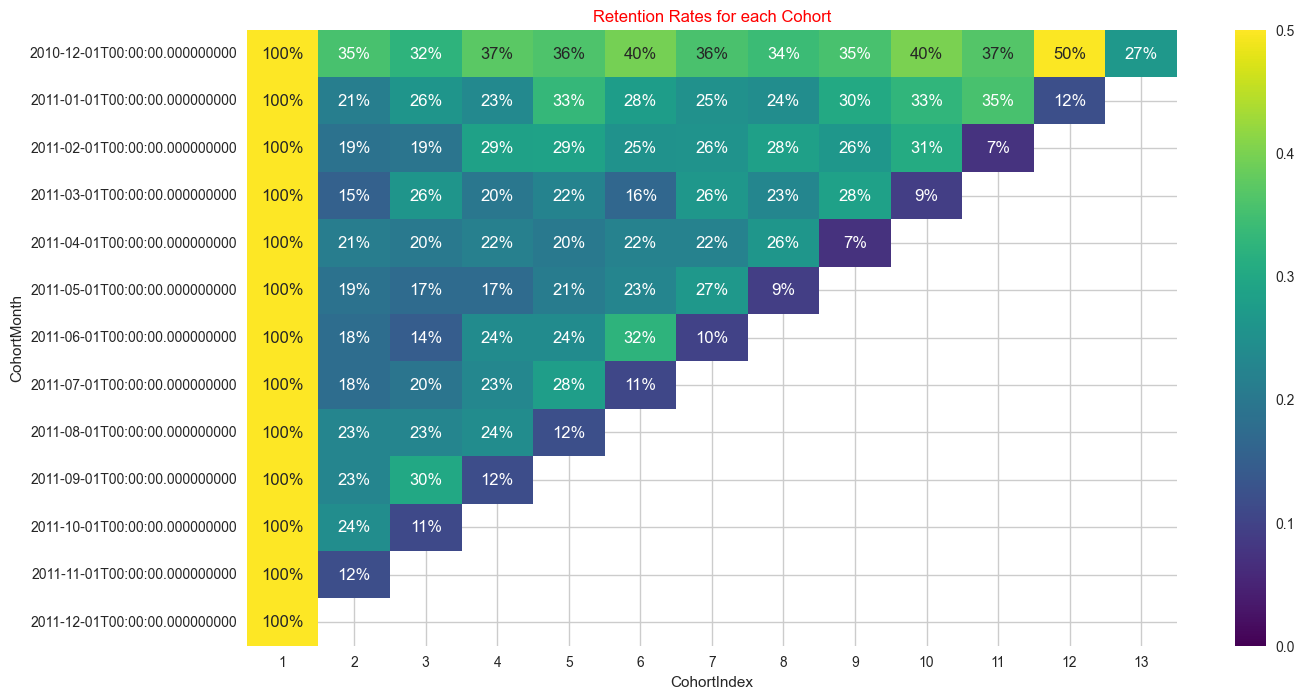

In [155]:
# heat map for retention rate table
plt.figure(figsize=(15, 8))
plt.title('Retention Rates for each Cohort', fontdict={"color":"red"})
sns.heatmap(data=retention_rate, annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="viridis")
plt.show()


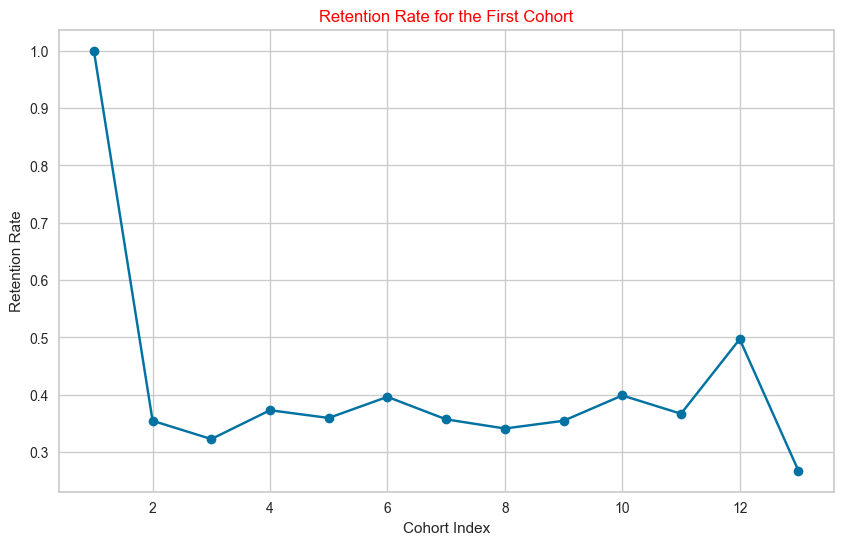

In [156]:
# Development of the retention rate for the 1st cohort
first_cohort = retention_rate.iloc[0]

plt.figure(figsize=(10, 6))
plt.plot(first_cohort.index, first_cohort.values, marker='o')

plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate')
plt.title('Retention Rate for the First Cohort', fontdict={"color": "red"})

plt.show()

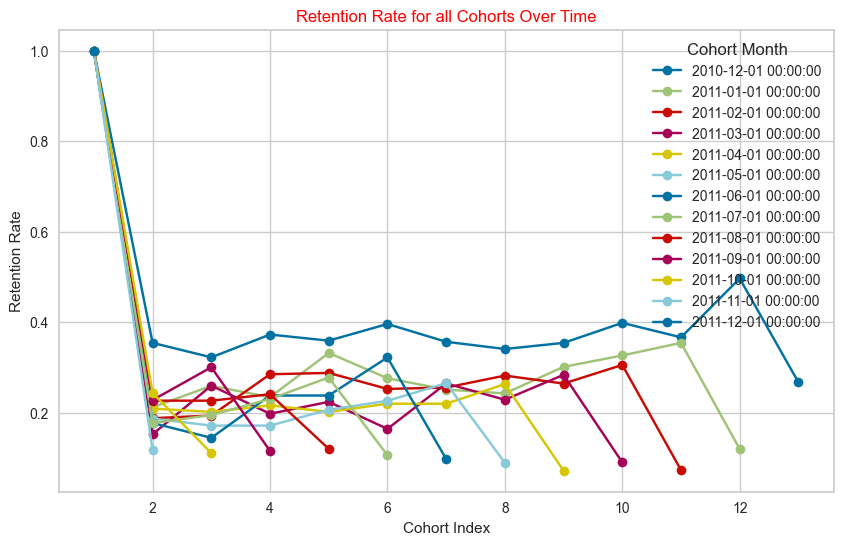

In [157]:
# let's visualize development of the retention rates for all cohorts with a line plot too
plt.figure(figsize=(10, 6))
for cohort_month, cohort_rates in retention_rate.iterrows():
    plt.plot(cohort_rates.index, cohort_rates.values, marker='o', label=str(cohort_month))


plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate')
plt.title('Retention Rate for all Cohorts Over Time', fontdict={"color": "red"})

plt.legend(title='Cohort Month', loc='best')
plt.show()

## Create the 2nd Cohort: Average Quantity Sold

### i. Pivot Cohort and Cohort Retention

In [158]:
#Average quantity for each cohort

cohort_quantity = df_cohort.groupby(['CohortMonth', 'CohortIndex'])['Quantity'].mean()
cohort_quantity = cohort_quantity.reset_index()
cohort_quantity


CohortMonth  CohortIndex   Quantity
0   2010-12-01            1  11.363528
1   2010-12-01            2  12.863370
2   2010-12-01            3  13.931012
3   2010-12-01            4  13.872916
4   2010-12-01            5  13.343757
..         ...          ...        ...
86  2011-10-01            2   7.231517
87  2011-10-01            3   8.189809
88  2011-11-01            1   9.019404
89  2011-11-01            2   9.503802
90  2011-12-01            1  15.673100

[91 rows x 3 columns]

In [159]:
# pivot table for average quantity
avg_cohort_quantity = cohort_quantity.pivot(index='CohortMonth',columns='CohortIndex',values='Quantity')
avg_cohort_quantity.round(1)
avg_cohort_quantity.index = avg_cohort_quantity.index.date
avg_cohort_quantity

CohortIndex         1          2          3          4          5          6   \
2010-12-01   11.363528  12.863370  13.931012  13.872916  13.343757  13.287995   
2011-01-01   18.080062   9.628663   9.442006  15.098384  10.089666  10.894436   
2011-02-01   10.997248  14.049922  15.948747  12.122111  12.320763  11.928197   
2011-03-01    9.695935  11.430435  13.305280  10.086977  13.532950  12.837738   
2011-04-01   10.068291  10.156757   9.720736  11.940795  11.863813   8.262323   
2011-05-01   10.657960   9.392857  14.841623  12.800244  11.045652   8.307816   
2011-06-01    9.549744  14.785714  11.980276  12.738017   9.818008   8.891049   
2011-07-01   10.145833  14.984576   6.572790   8.112313   5.778264   6.683406   
2011-08-01    9.393834   6.029240   5.028132   5.909297   6.558894        NaN   
2011-09-01   11.927963   6.139716   7.853473   9.006010        NaN        NaN   
2011-10-01    8.707598   7.231517   8.189809        NaN        NaN        NaN   
2011-11-01    9.019404   9.503802        NaN        NaN        NaN        NaN   
2011-12-01   15.673100        NaN        NaN        NaN        NaN        NaN   

CohortIndex         7           8          9          10         11  \
2010-12-01   14.274862   13.773035  16.144706  16.123957  16.672496   
2011-01-01   13.554896   10.814691  10.757836   8.695507   8.592414   
2011-02-01   13.872105   13.721955  10.996767  12.542671  13.819477   
2011-03-01   13.107456   14.062043  11.199703   9.734098        NaN   
2011-04-01    9.873959    9.363861   7.477707        NaN        NaN   
2011-05-01   10.816216  126.911243        NaN        NaN        NaN   
2011-06-01    9.350254         NaN        NaN        NaN        NaN   
2011-07-01         NaN         NaN        NaN        NaN        NaN   
2011-08-01         NaN         NaN        NaN        NaN        NaN   
2011-09-01         NaN         NaN        NaN        NaN        NaN   
2011-10-01         NaN         NaN        NaN        NaN        NaN   
2011-11-01         NaN         NaN        NaN        NaN        NaN   
2011-12-01         NaN         NaN        NaN        NaN        NaN   

CohortIndex         12         13  
2010-12-01   12.446232  14.462301  
2011-01-01   10.022152        NaN  
2011-02-01         NaN        NaN  
2011-03-01         NaN        NaN  
2011-04-01         NaN        NaN  
2011-05-01         NaN        NaN  
2011-06-01         NaN        NaN  
2011-07-01         NaN        NaN  
2011-08-01         NaN        NaN  
2011-09-01         NaN        NaN  
2011-10-01         NaN        NaN  
2011-11-01         NaN        NaN  
2011-12-01         NaN        NaN

### ii. Visualize analysis of cohort 2 using seaborn and matplotlib modules

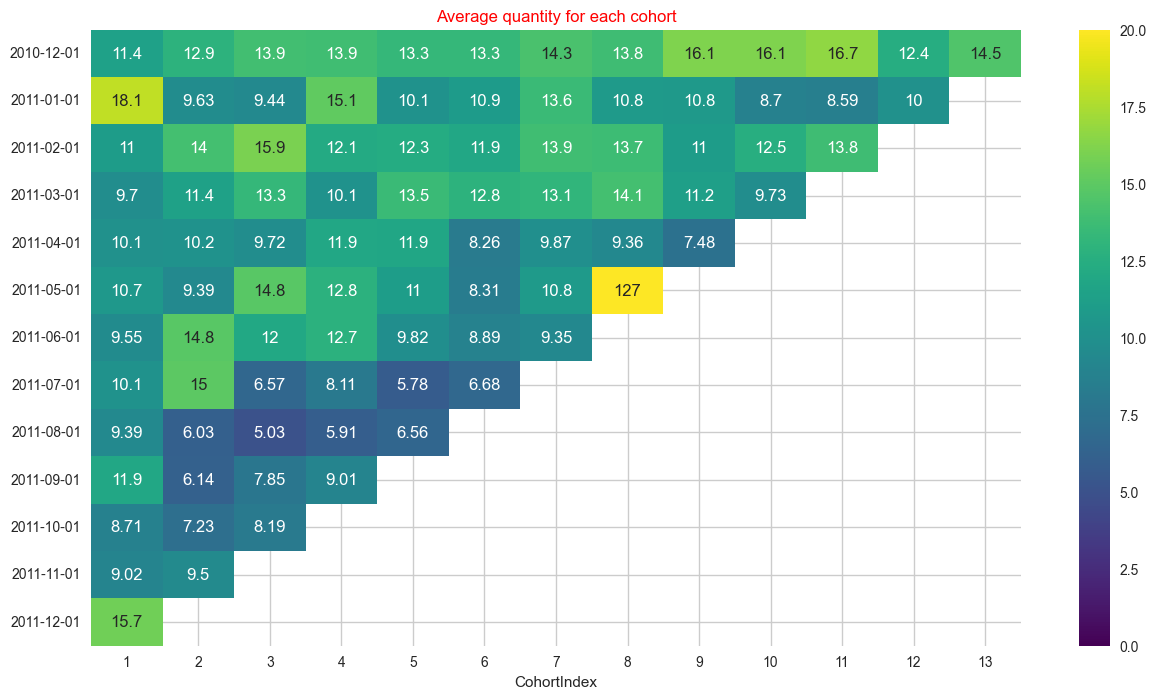

In [160]:
# display average sales for each cohort with a heatmap
plt.figure(figsize=(15, 8))
plt.title('Average quantity for each cohort', fontdict={"color": "red"})
sns.heatmap(data=avg_cohort_quantity,annot = True,vmin = 0.0, fmt= ".3g", vmax =20, cmap="viridis")
plt.show()


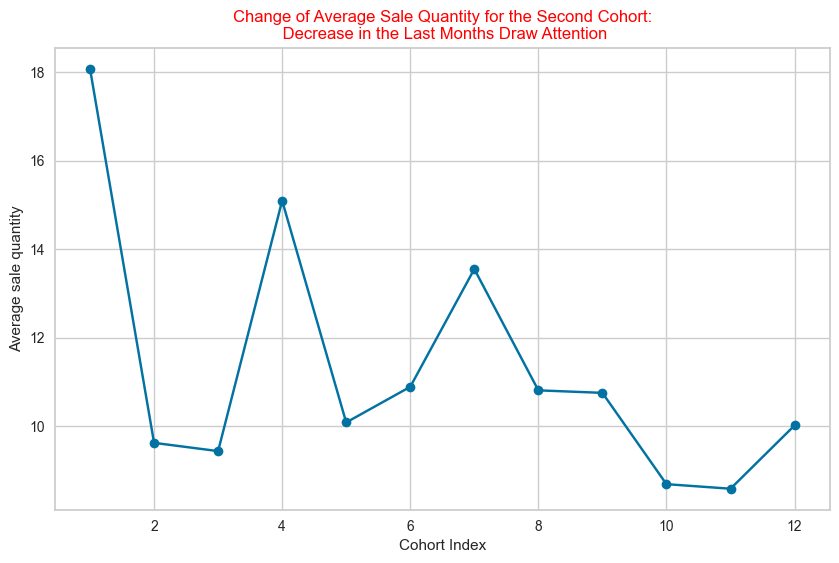

In [161]:
# Change of the average sale quantity for the 2nd cohort
second_cohort = avg_cohort_quantity.iloc[1]

plt.figure(figsize=(10, 6))
plt.plot(second_cohort.index, second_cohort.values, marker='o')

plt.xlabel('Cohort Index')
plt.ylabel('Average sale quantity')
plt.title('Change of Average Sale Quantity for the Second Cohort:\n Decrease in the Last Months Draw Attention', fontdict={"color": "red"})

plt.show()

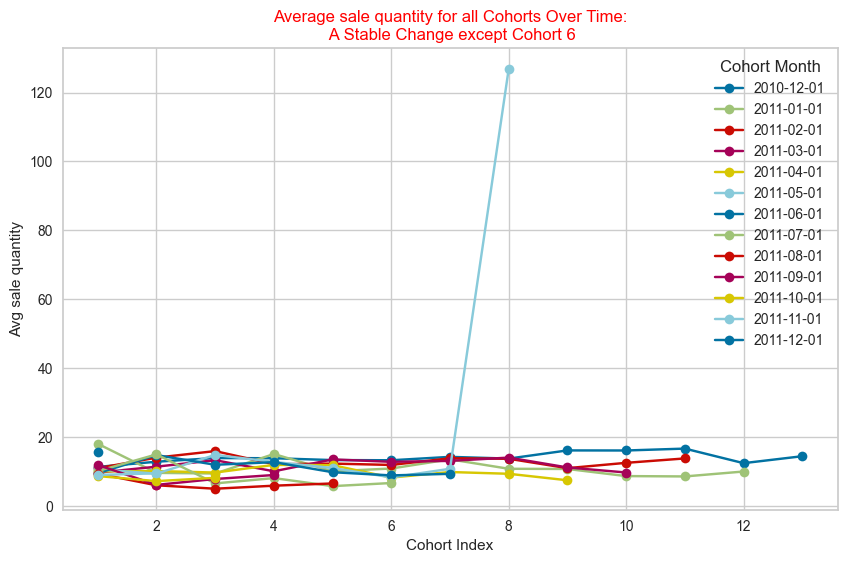

In [162]:
# let's visualize avg sale quantities for all cohorts with a line plot too
plt.figure(figsize=(10, 6))
for cohort_month, cohort_rates in avg_cohort_quantity.iterrows():
    plt.plot(cohort_rates.index, cohort_rates.values, marker='o', label=str(cohort_month))


plt.xlabel('Cohort Index')
plt.ylabel('Avg sale quantity')
plt.title('Average sale quantity for all Cohorts Over Time:\n A Stable Change except Cohort 6', fontdict={"color": "red"})

plt.legend(title='Cohort Month', loc='best')
plt.show()

## Create the 3rd Cohort: Average Sales


### i. Pivot Cohort and Cohort Retention

In [163]:
#Average sales for each cohort

cohort_sales = df_cohort.groupby(['CohortMonth', 'CohortIndex'])['total_price'].mean()
cohort_sales = cohort_sales.reset_index()
cohort_sales


CohortMonth  CohortIndex  total_price
0   2010-12-01            1    21.163619
1   2010-12-01            2    22.428102
2   2010-12-01            3    23.966176
3   2010-12-01            4    23.759081
4   2010-12-01            5    20.249368
..         ...          ...          ...
86  2011-10-01            2    11.138121
87  2011-10-01            3    13.771261
88  2011-11-01            1    11.755899
89  2011-11-01            2    13.104952
90  2011-12-01            1    29.440965

[91 rows x 3 columns]

In [164]:
# pivot table for average quantity
avg_cohort_sales = cohort_sales.pivot(index='CohortMonth',columns='CohortIndex',values='total_price')
avg_cohort_sales.round(1)
avg_cohort_sales.index = avg_cohort_sales.index.date
avg_cohort_sales

CohortIndex         1          2          3          4          5          6   \
2010-12-01   21.163619  22.428102  23.966176  23.759081  20.249368  25.818512   
2011-01-01   26.734451  18.768109  15.371226  28.195870  18.567428  19.144440   
2011-02-01   16.964951  20.129477  19.359382  19.155229  17.553785  16.124722   
2011-03-01   16.720157  20.170275  22.712318  17.656540  20.556776  18.414366   
2011-04-01   16.553392  20.094324  19.248520  18.668694  19.084949  14.126533   
2011-05-01   18.054166  16.988541  21.975681  21.074555  18.702971  13.484930   
2011-06-01   22.904797  15.230902  19.640020  16.554793  13.333966  13.312618   
2011-07-01   14.861597  24.679332  10.277149  12.903378   9.283442   9.354170   
2011-08-01   15.156665  13.013307  12.069951  15.632113  17.113510        NaN   
2011-09-01   18.255731  11.495928  13.651373  13.968594        NaN        NaN   
2011-10-01   13.492895  11.138121  13.771261        NaN        NaN        NaN   
2011-11-01   11.755899  13.104952        NaN        NaN        NaN        NaN   
2011-12-01   29.440965        NaN        NaN        NaN        NaN        NaN   

CohortIndex         7           8          9          10         11  \
2010-12-01   25.978081   23.912288  26.248719  31.455404  31.120817   
2011-01-01   24.181026   17.803055  17.792132  17.055612  18.021091   
2011-02-01   21.252140   22.961546  18.232292  21.961098  23.922043   
2011-03-01   20.711115   19.810885  16.460736  13.097654        NaN   
2011-04-01   14.933659   15.302139  11.546879        NaN        NaN   
2011-05-01   16.654228  261.761257        NaN        NaN        NaN   
2011-06-01   12.726920         NaN        NaN        NaN        NaN   
2011-07-01         NaN         NaN        NaN        NaN        NaN   
2011-08-01         NaN         NaN        NaN        NaN        NaN   
2011-09-01         NaN         NaN        NaN        NaN        NaN   
2011-10-01         NaN         NaN        NaN        NaN        NaN   
2011-11-01         NaN         NaN        NaN        NaN        NaN   
2011-12-01         NaN         NaN        NaN        NaN        NaN   

CohortIndex         12         13  
2010-12-01   21.717658  24.507526  
2011-01-01   18.983347        NaN  
2011-02-01         NaN        NaN  
2011-03-01         NaN        NaN  
2011-04-01         NaN        NaN  
2011-05-01         NaN        NaN  
2011-06-01         NaN        NaN  
2011-07-01         NaN        NaN  
2011-08-01         NaN        NaN  
2011-09-01         NaN        NaN  
2011-10-01         NaN        NaN  
2011-11-01         NaN        NaN  
2011-12-01         NaN        NaN

### ii. Visualize analysis of cohort 3 using seaborn and matplotlib modules

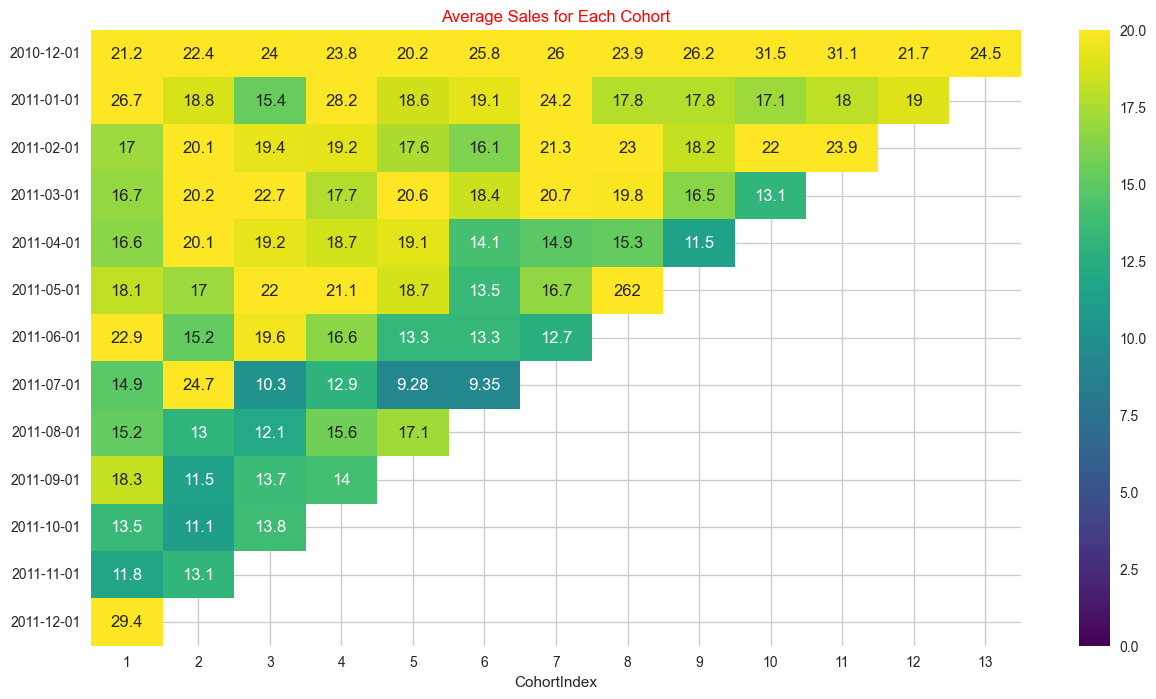

In [165]:
# display average sales for each cohort with a heatmap
plt.figure(figsize=(15, 8))
plt.title('Average Sales for Each Cohort', fontdict={"color": "red"})
sns.heatmap(data=avg_cohort_sales,annot = True,vmin = 0.0, fmt= ".3g", vmax =20, cmap="viridis")
plt.show()


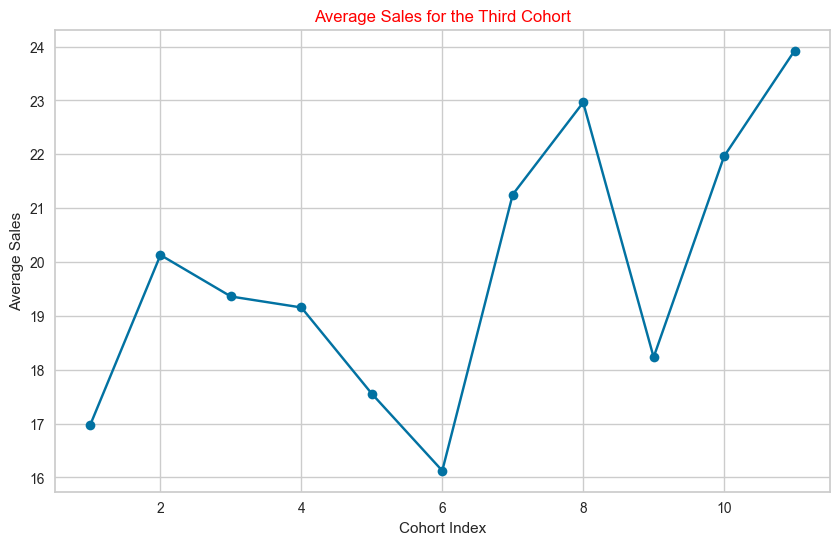

In [166]:
# Change of the average sales for the 3rd cohort
third_cohort = avg_cohort_sales.iloc[2]

plt.figure(figsize=(10, 6))
plt.plot(third_cohort.index, third_cohort.values, marker='o')

plt.xlabel('Cohort Index')
plt.ylabel('Average Sales')
plt.title('Average Sales for the Third Cohort', fontdict={"color": "red"})

plt.show()

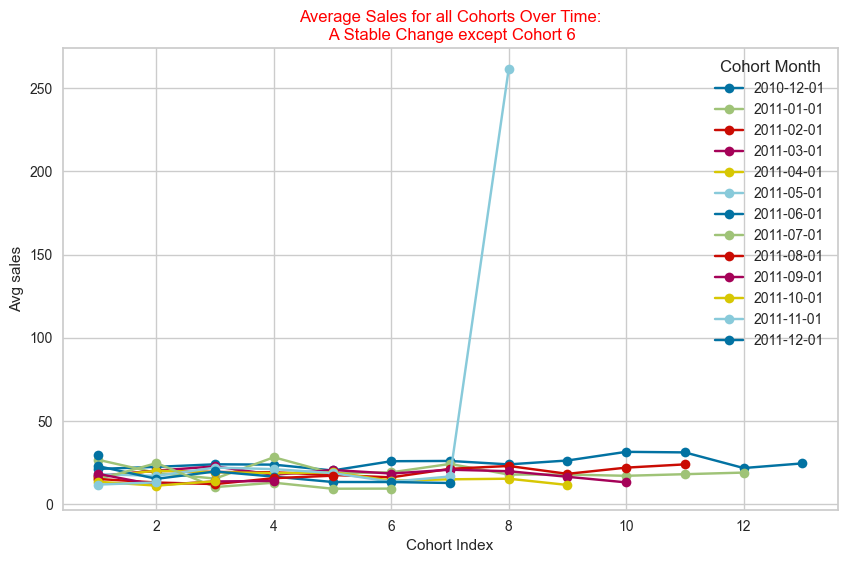

In [167]:
# let's visualize avg sales for all cohorts with a line plot
plt.figure(figsize=(10, 6))
for cohort_month, cohort_rates in avg_cohort_sales.iterrows():
    plt.plot(cohort_rates.index, cohort_rates.values, marker='o', label=str(cohort_month))


plt.xlabel('Cohort Index')
plt.ylabel('Avg sales')
plt.title('Average Sales for all Cohorts Over Time:\n A Stable Change except Cohort 6', fontdict={"color": "red"})

plt.legend(title='Cohort Month', loc='best')
plt.show()